In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib
from basicFunctions import *
import json
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
#from function_for_si_figures import *

# Order for SI plots

Table S1 has the parameters

Table S2 = values of NR,DR,NS,DS

Fig S1 = single cell pseudopotential for white and shot noise levels -- currently at bottom of main text


Movie M1 - the movie with similarity and patterns for random

Moview M2 - the movie with similarity and patterns for checkerboard

Fig S2 = the initial & final patterns and similarities for the special initial conditions

Fig S3 - similarity metric corresponding to Fig 2C (end of 3rd paragraph in that section)

Fig S4 = initial and final patterns and sims for mistakes
    include the corresponding results of 2D with sims

Fig S5 = initial and final patterns and sims for devs
    include the corresponding results of 2E with sims

Fig S6  = psuedpotential with thresholds for many noise levels

Fig S7 - the simulation results for alternate intiial conditions with s12, s11 and s13

Fig S8 = the average number of senders and receivers as a function of white and shot noise for random initial lattices

Fig S9 = the average number of S/R/iS/iR vs noise for checkerboard

Fig S10 - the phasespace with contacts

Fig S11 = similarity results from Fig 3 with random and checkerboard

Fig S12 = similarity and contacts as a function of noise for mistakes

Fig S13 = similarity and contacts as a function of noise for guassian perturbation ics


Fig S14 = Similarity and contacts for 3 other lattics sizes vs noise


Fig S15 = Fig 4 but for S to R

Fig S16 = Fig 4 but vs Sext, Rext and for S2R

Fig S17 = Fig 4 but vs Sext, Rext and for R2S

Fig S18 = Fig 4Eand F for checkerboard

Fig S19 - Fig 4E and F with Similarity for random and checkerboard (4 panels)??

Fig S20 = q correlation results form Fig 4


In [6]:
def getSensitivityRes(signal):
    paramList=['N0','D0','gamma','gammai','I0','kc','kt','lambdaD','lambdaN','nI']
    paramLabels=['$N_0$','$D_0$','$\gamma$','$\gamma_i$','$I_0$','$k_c$','$k_t$','$\lambda_D$','$\lambda_N$','$n_I$']
    nampDir={}
    for ii in range(len(paramList)):
        param=paramList[ii]
        dirn = "/home/madeline/Research/signaling/paper1/figures_sens/data/"
        dir16="/home/madeline/Research/signaling/paper1/figures_Oct2020/data/"

        for nAmp in [0,70,130,200]:
            if nAmp not in nampDir.keys():
                nampDir[nAmp]={'xval':[],'xparams':[],'ydown':[],'yup':[]}
            df = pd.read_csv(dirn+"Avg_16x16x1_white_n"+str(nAmp)+"_ss0_"+param+"_down.txt")
            df2 = pd.read_csv(dirn+"Avg_16x16x1_white_n"+str(nAmp)+"_ss0_"+param+"_up.txt")
            df_og = pd.read_csv(dir16+"Avg_16x16x1_white_nn"+str(nAmp)+"_s0.txt")

            tstart=10000
            downV=df[signal].values[0]
            upV=df2[signal].values[0]
            ogV = df_og[signal].values[0]
            changeD = (downV-ogV)/ogV*100.
            changeU = (upV-ogV)/ogV*100.

            nampDir[nAmp]['xval']+=[ii]
            nampDir[nAmp]['xparams']+=[paramLabels[ii]]
            nampDir[nAmp]['ydown']+=[changeD]
            nampDir[nAmp]['yup']+=[changeU]

        for nAmp in [0,7,13,20]:
            if nAmp not in nampDir.keys():
                nampDir[nAmp]={'xval':[],'xparams':[],'ydown':[],'yup':[]}
            df = pd.read_csv(dirn+"Avg_16x16x1_shot_n"+str(nAmp)+"_ss0_"+param+"_down.txt")
            df2 = pd.read_csv(dirn+"Avg_16x16x1_shot_n"+str(nAmp)+"_ss0_"+param+"_up.txt")
            if nAmp==0:
                df_og = pd.read_csv(dir16+"Avg_16x16x1_white_nn"+str(nAmp)+"_s0.txt")
            else:
                df_og = pd.read_csv(dir16+"Avg_16x16x1_shot_nn"+str(nAmp)+"_s0.txt")
            tstart=10000
            downV=df[signal].values[0]
            upV=df2[signal].values[0]
            ogV = df_og[signal].values[0]
            changeD = (downV-ogV)/ogV*100.
            changeU = (upV-ogV)/ogV*100.

            nampDir[nAmp]['xval']+=[ii]
            nampDir[nAmp]['xparams']+=[paramLabels[ii]]
            nampDir[nAmp]['ydown']+=[changeD]
            nampDir[nAmp]['yup']+=[changeU]

    return nampDir

In [7]:
def plotSA(ax,nampDir,noise,nType,signal,legend=None):
    if legend:
        ax.bar(nampDir[noise]['xval'],nampDir[noise]['ydown'],color='b',width=0.6,label='-10%')
        ax.bar(nampDir[noise]['xval'],nampDir[noise]['yup'],color='r',width=0.5,label='+10%')
    else:
        ax.bar(nampDir[noise]['xval'],nampDir[noise]['ydown'],color='b',width=0.6)
        ax.bar(nampDir[noise]['xval'],nampDir[noise]['yup'],color='r',width=0.5)

    ax.set_xticks(nampDir[noise]['xval'])
    ax.set_xticklabels(nampDir[noise]['xparams'])
    ax.set_title("Analysis for $\sigma_{"+nType+"}=$"+str(noise),fontsize=fs)
    ax.set_xlabel("Parameter")
    ax.set_ylabel("Change in "+signal+" (%)")

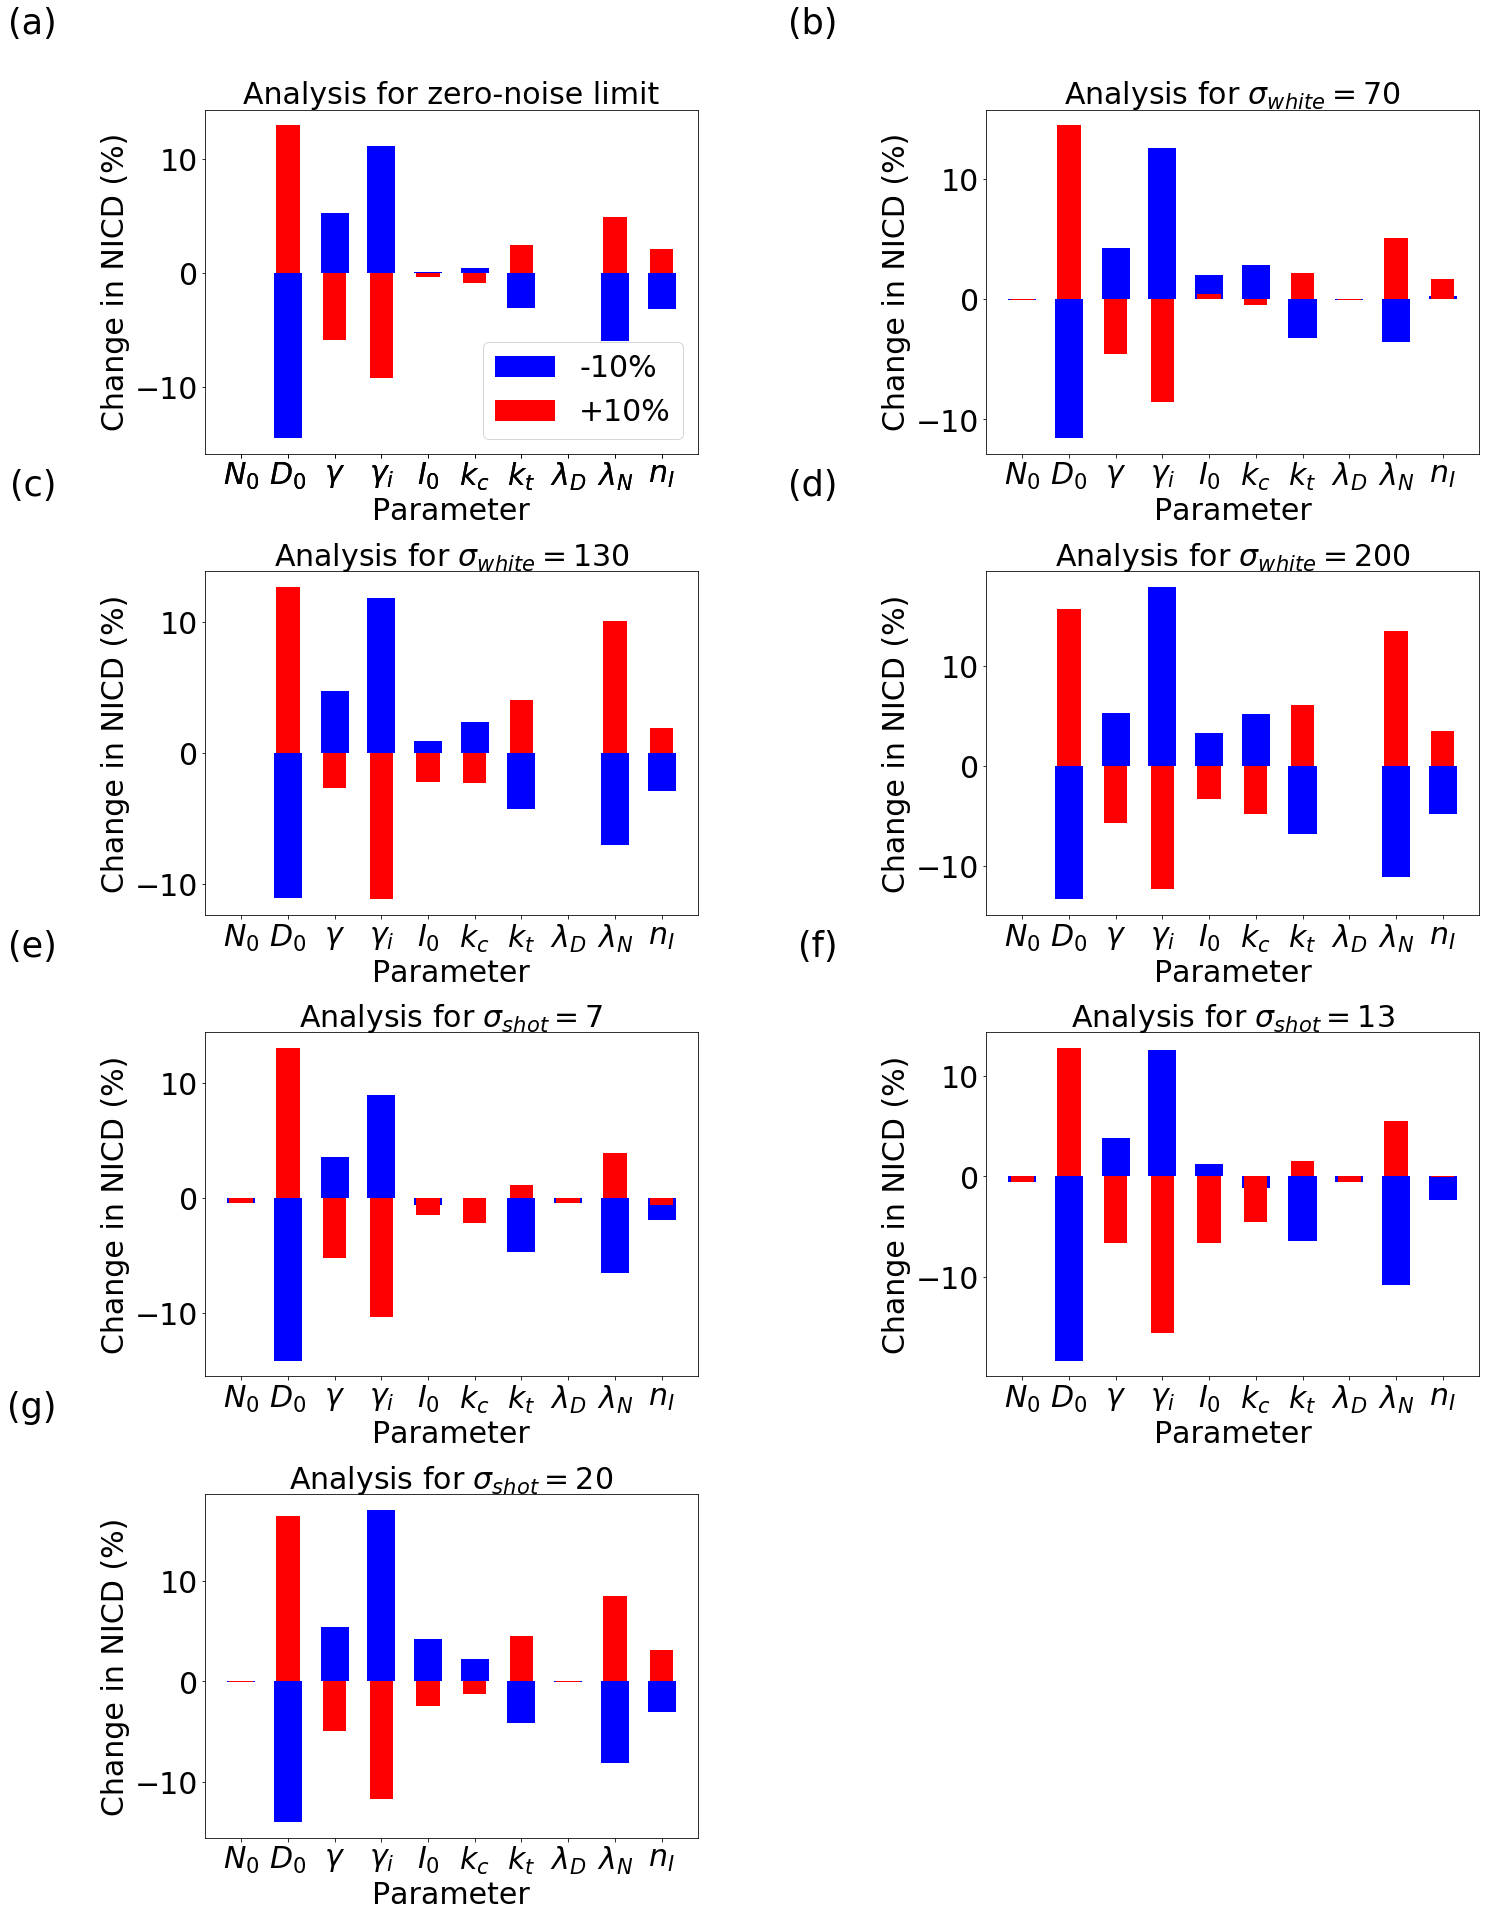

In [8]:
fig = plt.figure()
gs1 = gridspec.GridSpec(7, 3,width_ratios=[1.,0.5,1],height_ratios=[1,0.3,1.,0.3,1.,0.3,1])
gs1.update(left=0.05, right=3, wspace=0.05,hspace=0.03,top=6,bottom=0)
fs=30
matplotlib.rcParams.update({'font.size': fs})

nampDir=getSensitivityRes('I')

signal='NICD'

ax1a= plt.subplot(gs1[0, 0])
plotSA(ax1a,nampDir,0,'white',signal,legend=True)
ax1a.set_title("Analysis for zero-noise limit",fontsize=fs)
ax1a.legend(frameon=True)
ax1a.text(-0.3, 1.3, '(a)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)

ax1b= plt.subplot(gs1[0, 2])
plotSA(ax1b,nampDir,70,'white',signal)
ax1b.text(-0.3, 1.3, '(b)',transform=ax1b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)

ax1c= plt.subplot(gs1[2, 0])
plotSA(ax1c,nampDir,130,'white',signal)
ax1c.text(-0.3, 1.3, '(c)',transform=ax1c.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)

ax1d= plt.subplot(gs1[2, 2])
plotSA(ax1d,nampDir,200,'white',signal)
ax1d.text(-0.3, 1.3, '(d)',transform=ax1d.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)

ax1f= plt.subplot(gs1[4, 0])
plotSA(ax1f,nampDir,7,'shot',signal)
ax1f.text(-0.3, 1.3, '(e)',transform=ax1f.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)

ax1g= plt.subplot(gs1[4, 2])
plotSA(ax1g,nampDir,13,'shot',signal)
ax1g.text(-0.3, 1.3, '(f)',transform=ax1g.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)

ax1h= plt.subplot(gs1[6, 0])
plotSA(ax1h,nampDir,20,'shot',signal)
ax1h.text(-0.3, 1.3, '(g)',transform=ax1h.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)

fig.savefig("Figure_S1.png",bbox_inches='tight',dpi=300)
plt.show()
plt.close()

# Figure gillespie

[[   0    0    0 ...    0    0    0]
 [ 100  100  100 ...  100  100  100]
 [ 200  200  200 ...  200  200  200]
 ...
 [2700 2700 2700 ... 2700 2700 2700]
 [2800 2800 2800 ... 2800 2800 2800]
 [2900 2900 2900 ... 2900 2900 2900]]
1.77907935742
17.4376783688


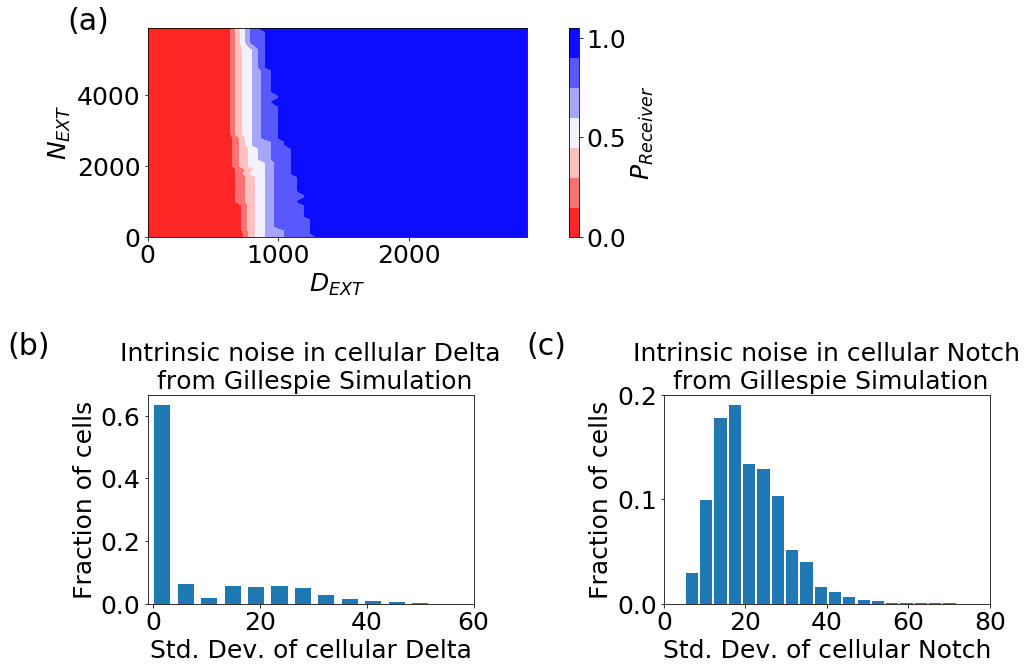

In [20]:
fig = plt.figure()
gs1 = gridspec.GridSpec(3, 3,width_ratios=[1.,0.5,1],height_ratios=[1,0.7,1])
gs1.update(left=0.05, right=2, wspace=0.05,hspace=0.03,top=2,bottom=0)
fs=25
matplotlib.rcParams.update({'font.size': fs})

with open("../../gillespie_phaseTransitions/gill1_analysis.json") as json_file:
    data = json.load(json_file)
Dext = data['Dext']
Next = data['Next']
prob = data['prob']
Nstd = data['Nstd']
Dstd = data['Dstd']    
    
ax1a = plt.subplot(gs1[0, 0:])
ax1a.text(-0.1, 1.1, '(a)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
inds=[]
for i in range(len(Dext)):
    if len(Dext[i])==60:
        inds+=[i]
Dext_red =np.array(list(np.array(Dext)[inds]))
Next_red =np.array(list(np.array(Next)[inds]))
prob_red =np.array(list(np.array(prob)[inds]))

inds=np.argsort(Next_red)
for i in range(len(Next_red)):
    inds = np.argsort(Next_red[i])
    Next_red[i] = Next_red[i][inds]
    prob_red[i]=prob_red[i][inds]
    
print Dext_red

cb=ax1a.contourf(Dext_red,Next_red,prob_red,cmap='bwr_r',vmax=1)
ax1a.set_xlabel("$D_{EXT}$")
ax1a.set_ylabel("$N_{EXT}$")

cbar = plt.colorbar(cb,ax=ax1a, cmap='bwr_r',ticks=[0,0.5,1],label='$P_{Receiver}$',fraction=0.5)

ax1c = plt.subplot(gs1[2, 0])
ax1c.text(-0.3, 1.3, '(b)',transform=ax1c.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax1c.bar(Dstd['bins'][:-1],np.array(Dstd['freq'])*1./np.sum(Dstd['freq']),width=3)
ind = np.argwhere(Dstd['freq']==np.max(Dstd['freq']))[:,0][0]
print Dstd['bins'][ind]
ax1c.set_xlabel("Std. Dev. of cellular Delta")
ax1c.set_xlim(- 1,60)
ax1c.set_ylabel("Fraction of cells")
ax1c.set_title("Intrinsic noise in cellular Delta\n from Gillespie Simulation",fontsize=fs)

ax1d = plt.subplot(gs1[2, 2])
ax1d.text(-0.3, 1.3, '(c)',transform=ax1d.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax1d.bar(Nstd['bins'][:-1],np.array(Nstd['freq'])*1./np.sum(Dstd['freq']),width=3)
ind = np.argwhere(Nstd['freq']==np.max(Nstd['freq']))[:,0][0]
print Nstd['bins'][ind]
ax1d.set_xlim(0,80)
ax1d.set_xlabel("Std. Dev. of cellular Notch")
ax1d.set_ylabel("Fraction of cells")
ax1d.set_title("Intrinsic noise in cellular Notch\n from Gillespie Simulation",fontsize=fs)

fig.savefig("Figure_S2.png",bbox_inches='tight',dpi=300)
plt.show()
plt.close()

In [51]:
N0 = 500
D0 = 1000
I0= 200
kc = 5e-4
kt=5e-5 
nI=2
lambdaN=2
lambdaD=0
y = 0.1
y_I = 0.5

NR = 5000#5139
NS = 500#567
DS = 1500#1561
DR = 0#22
IS = 0#1
IR = 800#802

NA = 0.5*(NS+NR)
DA = 0.5*(DS+DR)
IA = 0.5*(IS+IR)

In [52]:
def H_tmp(X,X0,nX,lambdY):
        return lambdY+(1.0 - lambdY)/(1.0+(X/X0)**nX)


In [53]:
N1A,N2A,N3A,N4A = N0*H_tmp(IA,I0,nI,lambdaN),kt*NA*DA,kc*NA*DA,y*NA
D1A,D2A,D3A,D4A = D0*H_tmp(IA,I0,nI,lambdaD),kt*DA*NA,kc*DA*NA,y*DA
I1A,I2A = kt*NA*DA,y_I*IA

with open("../../gillespie_phaseTransitions/gill_intrinsic.json") as json_file:
    data = json.load(json_file)
Dext = data['Dext']
Next = data['Next']
prob = data['prob']
Nstd = data['Nstd']
Dstd = data['Dstd']    
    
ind = np.argwhere(Nstd['freq']==np.max(Nstd['freq']))[:,0][0]
GillN= Nstd['bins'][ind]

ind = np.argwhere(Dstd['freq']==np.max(Dstd['freq']))[:,0][0]
GillD= Dstd['bins'][ind]

In [54]:
resWB=[]
for noise in np.arange(0,210,10):
    with open('oct_white'+str(noise)+'.json') as jsonfile:
        d0w =json.load(jsonfile)

    resWB +=[np.mean([list(d0w['Nstd']),list(d0w['Dstd'])])]
    print noise,resWB[-1],np.mean(d0w['Nstd']),np.mean(d0w['Dstd'])

0 4.257427743681319e-13 3.168021400767884e-13 5.346834086594754e-13
10 44.463746034667764 36.11580270115318 52.81168936818234
20 84.49949625635679 68.93464895099102 100.06434356172258
30 122.54733197175574 100.5706693644117 144.5239945790998
40 188.1248792345769 148.5685231988356 227.6812352703182
50 245.03287460609354 188.99675218891787 301.0689970232692
60 280.07542386159554 216.72175837745314 343.42908934573796
70 372.3647160925658 276.43654369845115 468.29288848668045
80 526.447260912977 382.5586416862547 670.3358801396992
90 501.84823912832894 378.62343694029346 625.0730413163644
100 540.8723421107793 418.5087064625617 663.235977758997
110 488.2799510569232 392.9428578970661 583.6170442167803
120 551.1087202985124 448.25009888407595 653.9673417129488
130 647.3819317212427 529.8160039120214 764.947859530464
140 884.7490785942039 722.5627521680881 1046.9354050203196
150 701.8722780026363 605.2069110615171 798.5376449437556
160 749.3655586633573 660.5958512123209 838.1352661143937
17

In [55]:
resWB=[]
for noise in np.arange(0,2100,100):
    filen = "../../oneCell/res_1cell/traj_1x1_white_n"+str(noise)+"_NE5000_DE0.json"
    with open(filen) as jsonfile:
        data =json.load(jsonfile)

    resWB +=[(data['Dstd']+data['Nstd'])*1./2.]
    print noise,resWB[-1]

0 2.14101360314e-11
100 40.7472860651
200 80.5737027108
300 120.270302324
400 159.859479876
500 199.357843774
600 238.780791917
700 278.143178727
800 317.456502556
900 356.73120187
1000 395.977495746
1100 435.202532316
1200 474.413578659
1300 513.617234323
1400 552.812493857
1500 591.979805646
1600 631.08452594
1700 670.076134978
1800 708.882385404
1900 747.404022198
2000 785.494970824


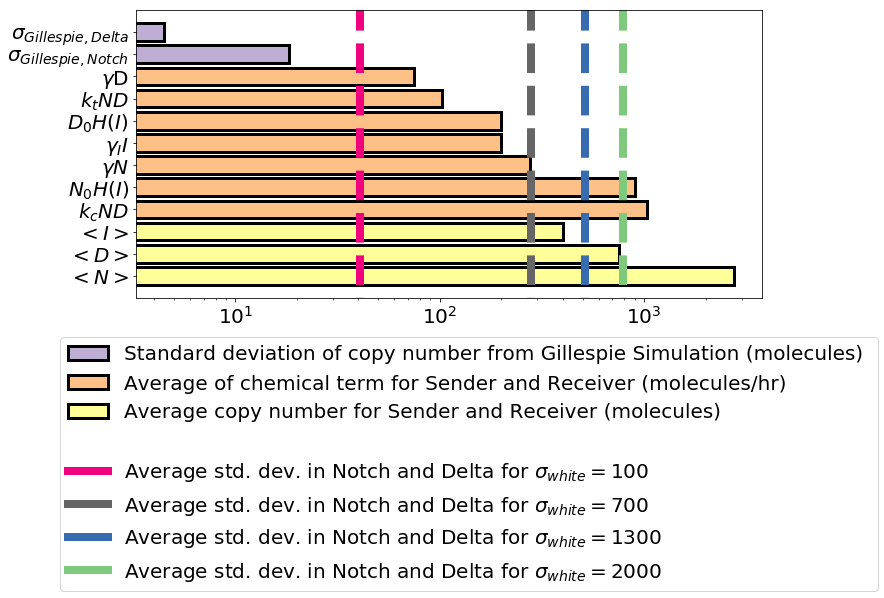

In [56]:
fig = plt.figure()
gs1 = gridspec.GridSpec(1,1)#,width_ratios=[1,0.5,1])#,height_ratios=[0.2,0.8,0.4,0.8,0.3,0.8,1])
gs1.update(left=0.05, right=1.5, wspace=0.05,hspace=0.05,top=1,bottom=0)
fs = 20
plt.rcParams['font.size']=fs


c1,c2,c3,c4,c5,c6,c7=['#ffff99','#fdc086','#beaed4','#f0027f','#666666','#386cb0','#7fc97f']

ax1 = plt.subplot(gs1[0,0])
ax1.barh('$<N>$',NA,color=c1,edgecolor='k',alpha=1,linewidth=3)
ax1.barh('$<D>$',DA,color=c1,edgecolor='k',alpha=1,linewidth=3)
ax1.barh('$<I>$',IA,color=c1,edgecolor='k',alpha=1,linewidth=3)
ax1.barh('$k_c N D$',N3A,color=c2,edgecolor='k',alpha=1,linewidth=3)
ax1.barh('$N_0 H(I)$',N1A,color=c2,edgecolor='k',alpha=1,linewidth=3)
ax1.barh('$\gamma N$',N4A,color=c2,edgecolor='k',alpha=1,linewidth=3)
ax1.barh('$\gamma_I I$',I2A,color=c2,edgecolor='k',alpha=1,linewidth=3)
ax1.barh('$D_0 H(I)$',D1A,color=c2,edgecolor='k',alpha=1,linewidth=3)
ax1.barh('$k_t N D$',I1A,color=c2,edgecolor='k',alpha=1,linewidth=3)
ax1.barh('$\gamma$D',D4A,color=c2,edgecolor='k',alpha=1,linewidth=3)
ax1.barh('$\sigma_{Gillespie,Notch}$',GillN,color=c3,edgecolor='k',alpha=1,linewidth=3)
ax1.barh('$\sigma_{Gillespie,Delta}$',GillD,color=c3,edgecolor='k',alpha=1,linewidth=3)
ax1.set_xscale('log')
ax1.set_ylim(-1,12)

legend_elements = [Patch(facecolor=c3,edgecolor='k',lw=3,label='Standard deviation of copy number from Gillespie Simulation (molecules) '),
                    Patch(facecolor=c2,edgecolor='k',lw=3,label='Average of chemical term for Sender and Receiver (molecules/hr)'),
                    Patch(facecolor=c1,edgecolor='k',lw=3,label='Average copy number for Sender and Receiver (molecules)')]
legend_elements+=[Patch(facecolor='w',label='')]

colors=[c4,c5,c6,c7]
slist=[1,7,13,20]#np.arange(1,21)#[5,6,14,15]
for i in range(len(slist)):
        ax1.vlines(resWB[slist[i]],-10,20,color=colors[i%len(colors)],lw=8,linestyle='--',label=slist[i])
        legend_elements+=[Line2D([0],[0],color=colors[i%len(colors)],lw=8,label="Average std. dev. in Notch and Delta for $\sigma_{white}=$"+str(100*slist[i]))]
ax1.legend(handles=legend_elements,bbox_to_anchor=(1.2,-0.1))

#ax1.fill_between([10,200],-10,100,facecolor='black',alpha=0.2)
#ax1.fill_between([1000,4000],-10,100,facecolor='black',alpha=0.2)
fig.savefig("Figure_S.png",bbox_inches='tight')

### Fig S2 - federico made and I copied over to SI

## fig S3

In [61]:
def plotRandConf(ax,nType,nAmp,log=None,xmax=None):
    for ls in [4,8,16,32]:
        if ls !=16:
            df = pd.read_csv(dirn+"Cont_"+str(ls)+'x'+str(ls)+"_"+nType+"_n"+str(nAmp)+"_s0.txt")
            time = np.arange(0,len(df),1)*0.1
            ax.plot(time,df['contOpp'].values/(ls*ls*2.)*100.,label='lattice: '+str(ls)+"x"+str(ls),lw=3)
        else:
            df = pd.read_csv(dir16+"Cont_"+str(ls)+'x'+str(ls)+"_"+nType+"_n"+str(nAmp)+"_s0.txt")
            time = np.arange(0,len(df),1)*0.1
            ax.plot(time,df['contOpp'].values/(ls*ls*2.)*100.,label='lattice: '+str(ls)+"x"+str(ls),lw=3)
    if log:
        ax1a.set_xscale("log")
    if xmax:
        ax.set_xlim(0,xmax)    
    else:
        ax.set_xlim(0,5000)    
    ax.set_xlabel("Time (hr)") 
    ax.set_ylabel("Correct Contacts (%)")    
    if nType=='white':
        ax.set_title("$\sigma_{"+str(nType)+"}$="+str(nAmp*10))
    else:
        ax.set_title("$\sigma_{"+str(nType)+"}$="+str(nAmp))

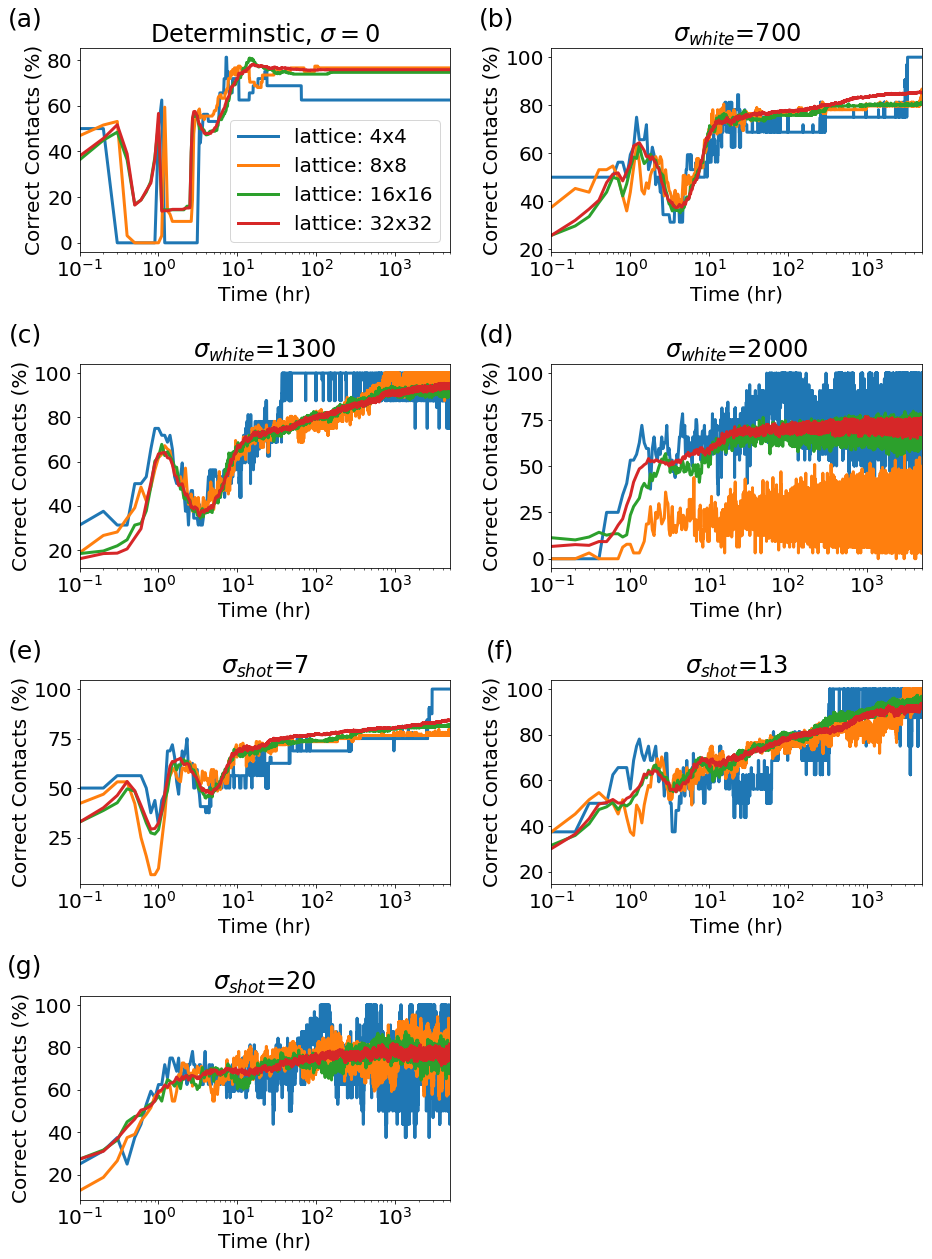

In [139]:
fig = plt.figure()
gs1 = gridspec.GridSpec(7, 3,width_ratios=[1.,0.2,1],height_ratios=[1,0.5,1.,0.5,1.,0.5,1])
gs1.update(left=0.05, right=2, wspace=0.05,hspace=0.03,top=4,bottom=0)
fs=20
matplotlib.rcParams.update({'font.size': fs})

dirn = "/home/madeline/Research/signaling/paper1/figures_lattices/data/"
dir16="/home/madeline/Research/signaling/paper1/figures_Oct2020/data/"


xmax=5000
ax1a = plt.subplot(gs1[0, 0])
plotRandConf(ax1a,'white',0,log=True,xmax=xmax)
ax1a.legend()
ax1a.text(-0.1, 1.2, '(a)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax1a.set_title("Determinstic, $\sigma=0$")

####
ax1a = plt.subplot(gs1[0, 2])
plotRandConf(ax1a,'white',70,log=True,xmax=xmax)
ax1a.text(-0.1, 1.2, '(b)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
####
ax1a = plt.subplot(gs1[2, 0])
plotRandConf(ax1a,'white',130,log=True,xmax=xmax)
ax1a.text(-0.1, 1.2, '(c)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
    ####
ax1a = plt.subplot(gs1[2, 2])
plotRandConf(ax1a,'white',200,log=True,xmax=xmax)
ax1a.text(-0.1, 1.2, '(d)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)


ax1a = plt.subplot(gs1[4, 0])
plotRandConf(ax1a,'shot',7,log=True,xmax=xmax)
ax1a.text(-0.1, 1.2, '(e)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)


ax1a = plt.subplot(gs1[4, 2])
plotRandConf(ax1a,'shot',13,log=True,xmax=xmax)
ax1a.text(-0.1, 1.2, '(f)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)

    
ax1a = plt.subplot(gs1[6, 0])
plotRandConf(ax1a,'shot',20,log=True,xmax=xmax)
ax1a.text(-0.1, 1.2, '(g)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)

fig.savefig("Figure_S4.png",bbox_inches='tight',dpi=300)
plt.show()
plt.close()

### Fig S2 - initial and final patterns for special ICS

In [211]:
def getFigS2_data(xx):
    df = pd.read_csv("data/fig2_"+xx+"1.txt",header=0)
    rm,cm = np.max(df['row'])+1,np.max(df['column'])+1
    
    df2 = pd.read_csv("data/fig2_"+xx+"2.txt",header=0)
    return  np.reshape(df['Initial'].values,(rm,cm)), np.reshape(df['Final'].values,(rm,cm)),df2['Sim'].values,df2['Cont'].values,df2['time'].values

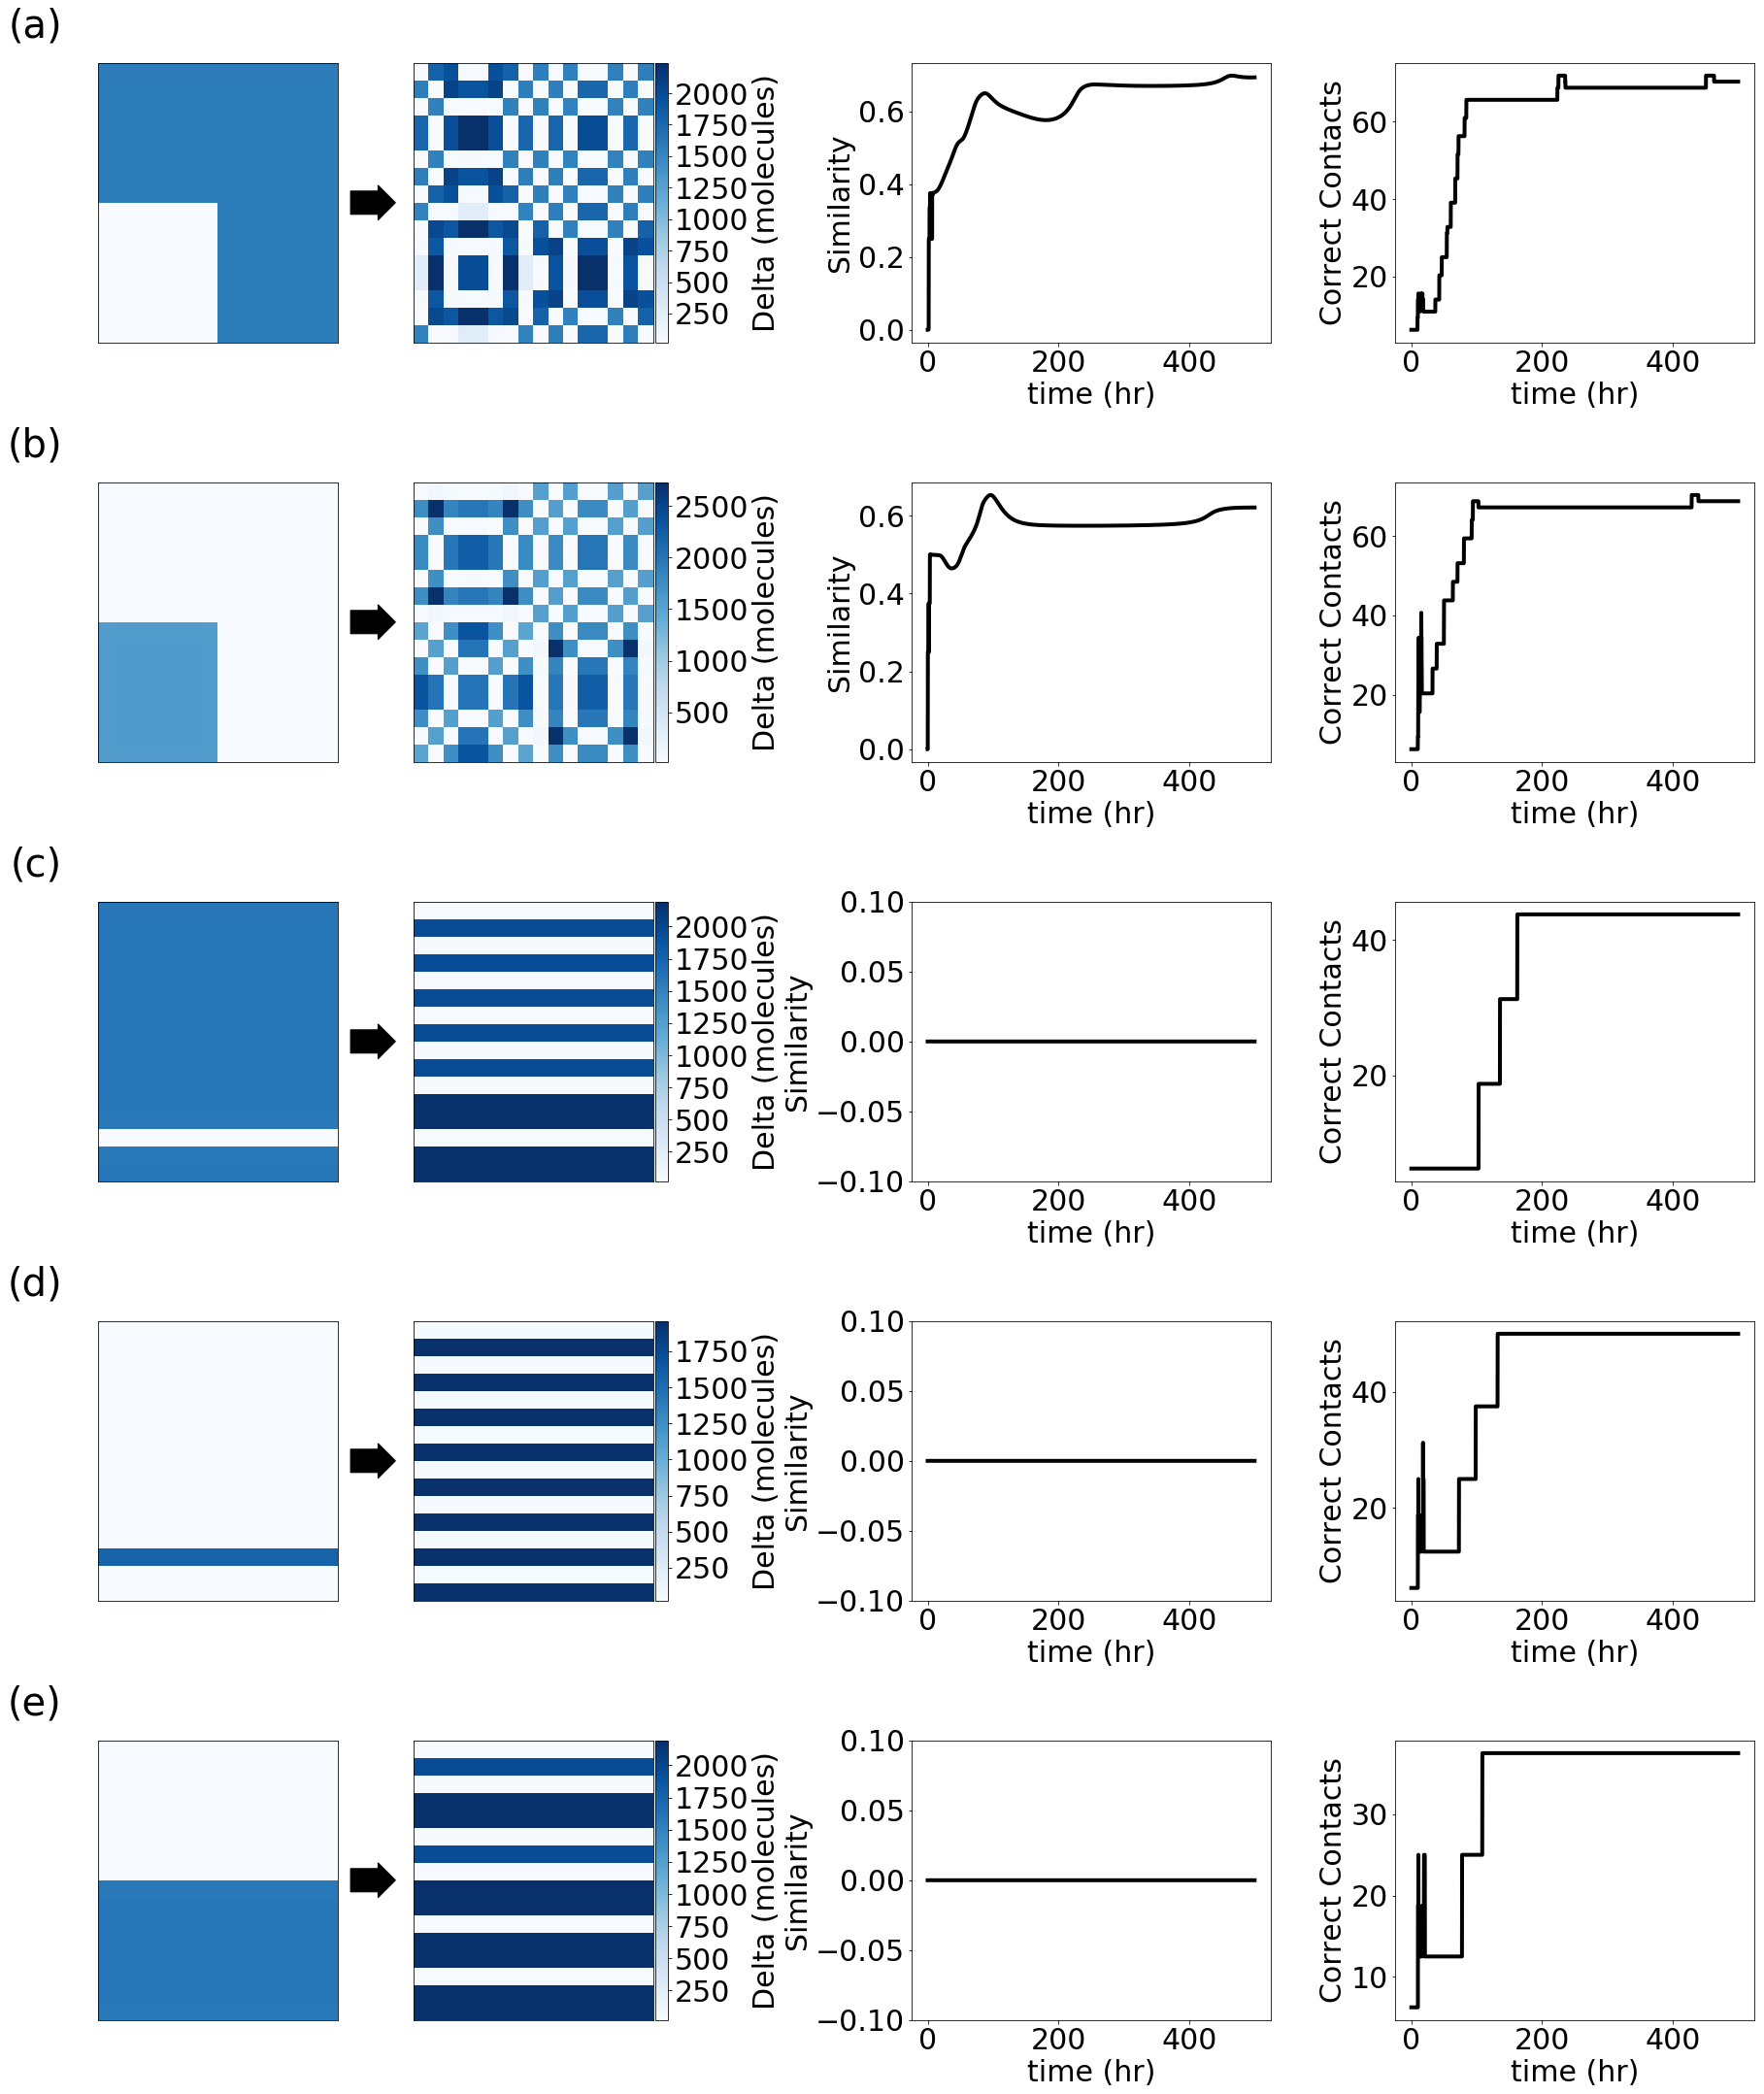

In [212]:
fig = plt.figure()
gs1 = gridspec.GridSpec(5, 8, width_ratios=[1,0.3,1,0.05,1,1.5,0.5,1.5])
gs1.update(left=0.05, right=4, wspace=0.01,hspace=0.5,top=7,bottom=0)
fs=30
matplotlib.rcParams.update({'font.size':fs})

## one corner receivers
ax1a = plt.subplot(gs1[0, 0])
ax2a = plt.subplot(gs1[0, 2])
cbax2a = plt.subplot(gs1[0, 3])
ax3a = plt.subplot(gs1[0, 5])
ax4a = plt.subplot(gs1[0, 7])
pattI0,pattF0,dist0,cc0,time = getFigS2_data('a')
vmin = [np.min(pattI0),np.min(pattF0)]
vmax = [np.max(pattI0),np.max(pattF0)]
vmin=np.min(vmin)
vmax=np.max(vmax)
ax1a.pcolormesh(pattI0,cmap='Blues',vmin=vmin,vmax=vmax)
a2=ax2a.pcolormesh(pattF0,cmap='Blues',vmin=vmin,vmax=vmax)
cb = matplotlib.colorbar.Colorbar(ax = cbax2a, mappable = a2)
cb.set_label(r'Delta (molecules)')
t = ax2a.text(-3, 8, "      ", ha="center", va="center",
              rotation=0, size=15, bbox=dict(boxstyle="rarrow", fc="black", ec="k", lw=1))
ax1a.set_xticks([])
ax2a.set_xticks([])
ax1a.set_yticks([])
ax2a.set_yticks([])

ax3a.plot(time,dist0,'k',lw=4)
ax4a.plot(time,cc0,'k',lw=4)


## one corner senders
ax1b = plt.subplot(gs1[1, 0])
ax2b = plt.subplot(gs1[1, 2])
cbax2b = plt.subplot(gs1[1, 3])
ax3b = plt.subplot(gs1[1, 5])
ax4b = plt.subplot(gs1[1, 7])
pattI0,pattF0,dist0,cc0,time = getFigS2_data('b')
vmin = [np.min(pattI0),np.min(pattF0)]
vmax = [np.max(pattI0),np.max(pattF0)]
vmin=np.min(vmin)
vmax=np.max(vmax)
ax1b.pcolormesh(pattI0,cmap='Blues',vmin=vmin,vmax=vmax)
a2=ax2b.pcolormesh(pattF0,cmap='Blues',vmin=vmin,vmax=vmax)
cb = matplotlib.colorbar.Colorbar(ax = cbax2b, mappable = a2)
cb.set_label(r'Delta (molecules)')
t = ax2b.text(-3, 8, "      ", ha="center", va="center",
              rotation=0, size=15, bbox=dict(boxstyle="rarrow", fc="black", ec="k", lw=1))
ax1b.set_xticks([])
ax2b.set_xticks([])
ax1b.set_yticks([])
ax2b.set_yticks([])

ax3b.plot(time,dist0,'k',lw=4)
ax4b.plot(time,cc0,'k',lw=4)

## one line senders
ax1e = plt.subplot(gs1[2, 0])
ax2e = plt.subplot(gs1[2, 2])
cbax2e = plt.subplot(gs1[2,3])
ax3e = plt.subplot(gs1[2, 5])
ax4e = plt.subplot(gs1[2, 7])
pattI0,pattF0,dist0,cc0,time = getFigS2_data('e')
vmin = [np.min(pattI0),np.min(pattF0)]
vmax = [np.max(pattI0),np.max(pattF0)]
vmin=np.min(vmin)
vmax=np.max(vmax)
ax1e.pcolormesh(pattI0,cmap='Blues',vmin=vmin,vmax=vmax)
a2=ax2e.pcolormesh(pattF0,cmap='Blues',vmin=vmin,vmax=vmax)
cb = matplotlib.colorbar.Colorbar(ax = cbax2e, mappable = a2)
cb.set_label(r'Delta (molecules)')
t = ax2e.text(-3, 8, "      ", ha="center", va="center",
              rotation=0, size=15, bbox=dict(boxstyle="rarrow", fc="black", ec="k", lw=1))
ax1e.set_xticks([])
ax2e.set_xticks([])
ax1e.set_yticks([])
ax2e.set_yticks([])
ax3e.plot(time,dist0,'k',lw=4)
ax4e.plot(time,cc0,'k',lw=4)

## half/half receivers, senders
ax1f = plt.subplot(gs1[3, 0])
ax2f = plt.subplot(gs1[3, 2])
cbax2f = plt.subplot(gs1[3,3])
ax3f = plt.subplot(gs1[3, 5])
ax4f = plt.subplot(gs1[3, 7])
pattI0,pattF0,dist0,cc0,time = getFigS2_data('f')
vmin = [np.min(pattI0),np.min(pattF0)]
vmax = [np.max(pattI0),np.max(pattF0)]
vmin=np.min(vmin)
vmax=np.max(vmax)
ax1f.pcolormesh(pattI0,cmap='Blues',vmin=vmin,vmax=vmax)
a2=ax2f.pcolormesh(pattF0,cmap='Blues',vmin=vmin,vmax=vmax)
cb = matplotlib.colorbar.Colorbar(ax = cbax2f, mappable = a2)
cb.set_label(r'Delta (molecules)')
t = ax2f.text(-3, 8, "      ", ha="center", va="center",
              rotation=0, size=15, bbox=dict(boxstyle="rarrow", fc="black", ec="k", lw=1))
ax1f.set_xticks([])
ax2f.set_xticks([])
ax1f.set_yticks([])
ax2f.set_yticks([])
ax3f.plot(time,dist0,'k',lw=4)
ax4f.plot(time,cc0,'k',lw=4)


## half/half receivers, senders
ax1g = plt.subplot(gs1[4, 0])
ax2g = plt.subplot(gs1[4, 2])
cbax2g = plt.subplot(gs1[4,3])
ax3g = plt.subplot(gs1[4, 5])
ax4g = plt.subplot(gs1[4, 7])
pattI0,pattF0,dist0,cc0,time = getFigS2_data('g')
vmin = [np.min(pattI0),np.min(pattF0)]
vmax = [np.max(pattI0),np.max(pattF0)]
vmin=np.min(vmin)
vmax=np.max(vmax)
ax1g.pcolormesh(pattI0,cmap='Blues',vmin=vmin,vmax=vmax)
a2=ax2g.pcolormesh(pattF0,cmap='Blues',vmin=vmin,vmax=vmax)
cb = matplotlib.colorbar.Colorbar(ax = cbax2g, mappable = a2)
cb.set_label(r'Delta (molecules)')
t = ax2g.text(-3, 8, "      ", ha="center", va="center",
              rotation=0, size=15, bbox=dict(boxstyle="rarrow", fc="black", ec="k", lw=1))
ax1g.set_xticks([])
ax2g.set_xticks([])
ax1g.set_yticks([])
ax2g.set_yticks([])
ax3g.plot(time,dist0,'k',lw=4)
ax4g.plot(time,cc0,'k',lw=4)

ax3a.set_xlabel("time (hr)")
ax3b.set_xlabel("time (hr)")
#ax3c.set_xlabel("time (hr)")
#ax3d.set_xlabel("time (hr)")
ax3e.set_xlabel("time (hr)")
ax3f.set_xlabel("time (hr)")
ax3g.set_xlabel("time (hr)")
ax4a.set_xlabel("time (hr)")
ax4b.set_xlabel("time (hr)")
#ax4c.set_xlabel("time (hr)")
#ax4d.set_xlabel("time (hr)")
ax4e.set_xlabel("time (hr)")
ax4f.set_xlabel("time (hr)")
ax4g.set_xlabel("time (hr)")

ax3a.set_ylabel("Similarity")
ax3b.set_ylabel("Similarity")
#ax3c.set_ylabel("Similarity")
#ax3d.set_ylabel("Similarity")
ax3e.set_ylabel("Similarity")
ax3f.set_ylabel("Similarity")
ax3g.set_ylabel("Similarity")

ax4a.set_ylabel("Correct Contacts")
ax4b.set_ylabel("Correct Contacts")
#ax4c.set_ylabel("Correct Contacts")
#ax4d.set_ylabel("Correct Contacts")
ax4e.set_ylabel("Correct Contacts")
ax4f.set_ylabel("Correct Contacts")
ax4g.set_ylabel("Correct Contacts")

ax3e.set_ylim(-0.1,0.1)
ax3f.set_ylim(-0.1,0.1)
ax3g.set_ylim(-0.1,0.1)

#cbax2a=plt.subplot(gs1[0,3])
#cb = matplotlib.colorbar.Colorbar(ax = cbax2h, mappable = a2h)
#cb.set_label(r' log10(Time))', labelpad=10)
ax1a.text(-0.15, 1.2, '(a)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+10)
ax1b.text(-0.15, 1.2, '(b)',transform=ax1b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+10)
#ax1c.text(-0.15, 1.2, 'C',transform=ax1c.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs)
#ax1d.text(-0.15, 1.2, 'D',transform=ax1d.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs)
ax1e.text(-0.15, 1.2, '(c)',transform=ax1e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+10)
ax1f.text(-0.15, 1.2, '(d)',transform=ax1f.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+10)
ax1g.text(-0.15, 1.2, '(e)',transform=ax1g.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+10)

fig.savefig("Figure_S5.png",bbox_inches='tight',dpi=300)
plt.show()
plt.close()

### Fig S3 - corresponding to Fig 2C

In [213]:
def getF3_dat():
    df = pd.read_csv("data/fig2c.txt")
    return df['xcheck'].values,df['ycheck'].values,df['xrand'].values,df['yrand'].values

In [214]:
def getF3_a():
    df = pd.read_csv("data/fig3_a_w2.txt",header=None)
    df1 = pd.read_csv("data/fig3_a_w0.txt",header=None)
    df2 = pd.read_csv("data/fig3_a_s2.txt",header=None)
    df3 = pd.read_csv("data/fig3_a_s0.txt",header=None)
    
    return df.values[10000:100000],df1.values[10000:100000],df2.values[10000:100000],df3.values[10000:100000]

In [ ]:
fig = plt.figure(figsize=(8,6))
gs1 = gridspec.GridSpec(5,5,width_ratios=[1,0.4,1,0.4,1],height_ratios=[0.3,0.7,0.2,0.7,0.3])
gs1.update(left=0.05, right=3, wspace=0.01,hspace=0.5,top=1.5,bottom=0)
fs=25
matplotlib.rcParams.update({'font.size':fs})

ax = plt.subplot(gs1[1:4,4])# C # Similarity for s&P and random
xc,yc,xr,yr=getF3_dat()
ax.plot(xc,yc,label='nucleating',color='tab:orange',linewidth=4)
ax.plot(xr,yr,label='random',color='tab:blue',linewidth=4)
ax.set_xlim(-5,400)
ax.set_xlabel("Time (hr)")
ax.set_ylabel("Similarity")
ax.set_title("Similarity to\ncheckerboard pattern",fontsize=fs)
ax.legend(frameon=False)


ax1 = plt.subplot(gs1[1:4,0])# C # Similarity for s&P and random
ax2 = plt.subplot(gs1[0:2,2])# C # Similarity for s&P and random
ax4 = plt.subplot(gs1[3:,2])# C # Similarity for s&P and random
w2,w0,s2,s0=getF3_a()#,s2,s0=getF3_a()
w2 = w2.flatten()
w0 = w0.flatten()
s2 = s2.flatten()
ax1.hist(w0,bins=20,density=True)
ax1.set_xlabel("Delta (molecules)")
ax1.set_ylabel("Probability density")
ax1.set_title("Delta molecules in equilibrated\n lattice for $\sigma_{white}=0$",fontsize=fs)

ax2.hist(w2,bins=50,density=True)
ax2.set_xlabel("Delta (molecules)")
ax2.set_ylabel("Probability density")
ax2.set_title("Delta molecules in equilibrated\n lattice for $\sigma_{white}=2000$",fontsize=fs)

ax4.hist(s2,bins=50,density=True)
ax4.set_xlabel("Delta (molecules)")
ax4.set_ylabel("Probability density")
ax4.set_title("Delta molecules in equilibrated\n lattice for $\sigma_{shot}=20$",fontsize=fs)
ax1.set_xlim(0,2200)
ax2.set_xlim(0,6000)
ax4.set_xlim(0,6000)

ax1.text(-0.17, 1.1, '(a)',transform=ax1.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+10)
ax2.text(-0.17, 1.3, '(b)',transform=ax2.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+10)
ax4.text(-0.17, 1.3, '(c)',transform=ax4.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+10)
ax.text(-0.12, 1.1, '(d)',transform=ax.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+10)

fig.savefig("Figure_S6.png",bbox_inches='tight',dpi=300)

### Fig S4 - companion to Fig 2D

In [ ]:
def getFigS3_data(xx):
    tend=2000
    df = pd.read_csv("data/fig3_"+xx+"1.txt",header=0)
    rm,cm = np.max(df['row'])+1,np.max(df['column'])+1
    
    df2 = pd.read_csv("data/fig3_"+xx+"2.txt",header=0)
    return  np.reshape(df['Initial'].values,(rm,cm)), np.reshape(df['Final'].values,(rm,cm)),df2['Sim'].values[:tend],df2['Cont'].values[:tend],df2['time'].values[:tend]

In [ ]:
fig = plt.figure()
gs1 = gridspec.GridSpec(6, 8, width_ratios=[1,0.3,1,0.05,1,1.5,0.5,1.5])
gs1.update(left=0.05, right=4, wspace=0.01,hspace=0.5,top=7,bottom=0)
fs=30
matplotlib.rcParams.update({'font.size':fs})

ax1a = plt.subplot(gs1[0, 0])
ax2a= plt.subplot(gs1[0, 2])
cbax2a = plt.subplot(gs1[0,3])
ax3a = plt.subplot(gs1[0, 5])
ax4a = plt.subplot(gs1[0, 7])
pattI0,pattF0,dist0,cc0,time = getFigS3_data('a')
vmin = [np.min(pattI0),np.min(pattF0)]
vmax = [np.max(pattI0),np.max(pattF0)]
vmin=np.min(vmin)
vmax=np.max(vmax)
ax1a.pcolormesh(pattI0,cmap='Blues',vmin=vmin,vmax=vmax)
a2=ax2a.pcolormesh(pattF0,cmap='Blues',vmin=vmin,vmax=vmax)
cb = matplotlib.colorbar.Colorbar(ax = cbax2a, mappable = a2)
cb.set_label(r'Delta (molecules)')
t = ax2a.text(-3, 8, "      ", ha="center", va="center",
              rotation=0, size=15, bbox=dict(boxstyle="rarrow", fc="black", ec="k", lw=1))
ax1a.set_xticks([])
ax2a.set_xticks([])
ax1a.set_yticks([])
ax2a.set_yticks([])
ax3a.plot(time,dist0,'k',lw=4)
ax4a.plot(time,cc0,'k',lw=4)

#################################
ax1b = plt.subplot(gs1[1, 0])
ax2b= plt.subplot(gs1[1, 2])
cbax2b = plt.subplot(gs1[1,3])
ax3b = plt.subplot(gs1[1, 5])
ax4b = plt.subplot(gs1[1, 7])
pattI0,pattF0,dist0,cc0,time = getFigS3_data('b')
vmin = [np.min(pattI0),np.min(pattF0)]
vmax = [np.max(pattI0),np.max(pattF0)]
vmin=np.min(vmin)
vmax=np.max(vmax)
ax1b.pcolormesh(pattI0,cmap='Blues',vmin=vmin,vmax=vmax)
a2=ax2b.pcolormesh(pattF0,cmap='Blues',vmin=vmin,vmax=vmax)
cb = matplotlib.colorbar.Colorbar(ax = cbax2b, mappable = a2)
cb.set_label(r'Delta (molecules)')
t = ax2b.text(-3, 8, "      ", ha="center", va="center",
              rotation=0, size=15, bbox=dict(boxstyle="rarrow", fc="black", ec="k", lw=1))
ax1b.set_xticks([])
ax2b.set_xticks([])
ax1b.set_yticks([])
ax2b.set_yticks([])
ax3b.plot(time,dist0,'k',lw=4)
ax4b.plot(time,cc0,'k',lw=4)

#################################
ax1c = plt.subplot(gs1[2, 0])
ax2c= plt.subplot(gs1[2, 2])
cbax2c = plt.subplot(gs1[2,3])
ax3c = plt.subplot(gs1[2, 5])
ax4c = plt.subplot(gs1[2, 7])
pattI0,pattF0,dist0,cc0,time = getFigS3_data('c')
vmin = [np.min(pattI0),np.min(pattF0)]
vmax = [np.max(pattI0),np.max(pattF0)]
vmin=np.min(vmin)
vmax=np.max(vmax)
ax1c.pcolormesh(pattI0,cmap='Blues',vmin=vmin,vmax=vmax)
a2=ax2c.pcolormesh(pattF0,cmap='Blues',vmin=vmin,vmax=vmax)
cb = matplotlib.colorbar.Colorbar(ax = cbax2c, mappable = a2)
cb.set_label(r'Delta (molecules)')
t = ax2c.text(-3, 8, "      ", ha="center", va="center",
              rotation=0, size=15, bbox=dict(boxstyle="rarrow", fc="black", ec="k", lw=1))
ax1c.set_xticks([])
ax2c.set_xticks([])
ax1c.set_yticks([])
ax2c.set_yticks([])
ax3c.plot(time,dist0,'k',lw=4)
ax4c.plot(time,cc0,'k',lw=4)

#################################
ax1d = plt.subplot(gs1[3, 0])
ax2d= plt.subplot(gs1[3, 2])
cbax2d = plt.subplot(gs1[3,3])
ax3d = plt.subplot(gs1[3, 5])
ax4d = plt.subplot(gs1[3, 7])
pattI0,pattF0,dist0,cc0,time = getFigS3_data('d')
vmin = [np.min(pattI0),np.min(pattF0)]
vmax = [np.max(pattI0),np.max(pattF0)]
vmin=np.min(vmin)
vmax=np.max(vmax)
ax1d.pcolormesh(pattI0,cmap='Blues',vmin=vmin,vmax=vmax)
a2=ax2d.pcolormesh(pattF0,cmap='Blues',vmin=vmin,vmax=vmax)
cb = matplotlib.colorbar.Colorbar(ax = cbax2d, mappable = a2)
cb.set_label(r'Delta (molecules)')
t = ax2d.text(-3, 8, "      ", ha="center", va="center",
              rotation=0, size=15, bbox=dict(boxstyle="rarrow", fc="black", ec="k", lw=1))
ax1d.set_xticks([])
ax2d.set_xticks([])
ax1d.set_yticks([])
ax2d.set_yticks([])
ax3d.plot(time,dist0,'k',lw=4)
ax4d.plot(time,cc0,'k',lw=4)

#################################
ax1e = plt.subplot(gs1[4, 0])
ax2e = plt.subplot(gs1[4, 2])
cbax2e = plt.subplot(gs1[4,3])
ax3e = plt.subplot(gs1[4, 5])
ax4e = plt.subplot(gs1[4, 7])
pattI0,pattF0,dist0,cc0,time = getFigS3_data('e')
vmin = [np.min(pattI0),np.min(pattF0)]
vmax = [np.max(pattI0),np.max(pattF0)]
vmin=np.min(vmin)
vmax=np.max(vmax)
ax1e.pcolormesh(pattI0,cmap='Blues',vmin=vmin,vmax=vmax)
a2=ax2e.pcolormesh(pattF0,cmap='Blues',vmin=vmin,vmax=vmax)
cb = matplotlib.colorbar.Colorbar(ax = cbax2e, mappable = a2)
cb.set_label(r'Delta (molecules)')
t = ax2e.text(-3, 8, "      ", ha="center", va="center",
              rotation=0, size=15, bbox=dict(boxstyle="rarrow", fc="black", ec="k", lw=1))
ax1e.set_xticks([])
ax2e.set_xticks([])
ax1e.set_yticks([])
ax2e.set_yticks([])
ax3e.plot(time,dist0,'k',lw=4)
ax4e.plot(time,cc0,'k',lw=4)

################################
ax1f = plt.subplot(gs1[5, 0])
ax2f = plt.subplot(gs1[5, 2])
cbax2f = plt.subplot(gs1[5,3])
ax3f = plt.subplot(gs1[5, 5])
ax4f = plt.subplot(gs1[5, 7])
pattI0,pattF0,dist0,cc0,time = getFigS3_data('f')
vmin = [np.min(pattI0),np.min(pattF0)]
vmax = [np.max(pattI0),np.max(pattF0)]
vmin=np.min(vmin)
vmax=np.max(vmax)
ax1f.pcolormesh(pattI0,cmap='Blues',vmin=vmin,vmax=vmax)
a2=ax2f.pcolormesh(pattF0,cmap='Blues',vmin=vmin,vmax=vmax)
cb = matplotlib.colorbar.Colorbar(ax = cbax2f, mappable = a2)
cb.set_label(r'Delta (molecules)')
t = ax2f.text(-3, 8, "      ", ha="center", va="center",
              rotation=0, size=15, bbox=dict(boxstyle="rarrow", fc="black", ec="k", lw=1))
ax1f.set_xticks([])
ax2f.set_xticks([])
ax1f.set_yticks([])
ax2f.set_yticks([])
ax3f.plot(time,dist0,'k',lw=4)
ax4f.plot(time,cc0,'k',lw=4)

ax3a.set_xlabel("time (hr)")
ax3b.set_xlabel("time (hr)")
ax3c.set_xlabel("time (hr)")
ax3d.set_xlabel("time (hr)")
ax3e.set_xlabel("time (hr)")
ax3f.set_xlabel("time (hr)")
ax4a.set_xlabel("time (hr)")
ax4b.set_xlabel("time (hr)")
ax4c.set_xlabel("time (hr)")
ax4d.set_xlabel("time (hr)")
ax4e.set_xlabel("time (hr)")
ax4f.set_xlabel("time (hr)")

ax3a.set_ylabel("Similarity")
ax3b.set_ylabel("Similarity")
ax3c.set_ylabel("Similarity")
ax3d.set_ylabel("Similarity")
ax3e.set_ylabel("Similarity")
ax3f.set_ylabel("Similarity")

ax4a.set_ylabel("Correct Contacts")
ax4b.set_ylabel("Correct Contacts")
ax4c.set_ylabel("Correct Contacts")
ax4d.set_ylabel("Correct Contacts")
ax4e.set_ylabel("Correct Contacts")
ax4f.set_ylabel("Correct Contacts")


ax1a.text(-0.15, 1.2, '(a)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+10)
ax1b.text(-0.15, 1.2, '(b)',transform=ax1b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+10)
ax1c.text(-0.15, 1.2, '(c)',transform=ax1c.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+10)
ax1d.text(-0.15, 1.2, '(d)',transform=ax1d.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+10)
ax1e.text(-0.15, 1.2, '(e)',transform=ax1e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+10)
ax1f.text(-0.15, 1.2, '(f)',transform=ax1f.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+10)

fig.savefig("Figure_S7.png",bbox_inches='tight',dpi=300)

### Fig S5 - companion to Fig 2E

In [ ]:
def getFigS4_data(xx):
    tend=2000
    df = pd.read_csv("data/fig4_"+xx+"1.txt",header=0)
    rm,cm = np.max(df['row'])+1,np.max(df['column'])+1
    
    df2 = pd.read_csv("data/fig4_"+xx+"2.txt",header=0)
    return  np.reshape(df['Initial'].values,(rm,cm)), np.reshape(df['Final'].values,(rm,cm)),df2['Sim'].values[:tend],df2['Cont'].values[:tend],df2['time'].values[:tend]

In [ ]:
fig = plt.figure()
gs1 = gridspec.GridSpec(6, 8, width_ratios=[1,0.3,1,0.05,1.,1.5,0.5,1.5])
gs1.update(left=0.05, right=4, wspace=0.01,hspace=0.5,top=7,bottom=0)
fs=30
matplotlib.rcParams.update({'font.size':fs})

ax1a = plt.subplot(gs1[0, 0])
ax2a= plt.subplot(gs1[0, 2])
cbax2a = plt.subplot(gs1[0,3])
ax3a = plt.subplot(gs1[0, 5])
ax4a = plt.subplot(gs1[0, 7])
pattI0,pattF0,dist0,cc0,time = getFigS4_data('a')
vmin = [np.min(pattI0),np.min(pattF0)]
vmax = [np.max(pattI0),np.max(pattF0)]
vmin=np.min(vmin)
vmax=np.max(vmax)
ax1a.pcolormesh(pattI0,cmap='Blues',vmin=vmin,vmax=vmax)
a2=ax2a.pcolormesh(pattF0,cmap='Blues',vmin=vmin,vmax=vmax)
cb = matplotlib.colorbar.Colorbar(ax = cbax2a, mappable = a2)
cb.set_label(r'Delta (molecules)')
t = ax2a.text(-3, 8, "      ", ha="center", va="center",
              rotation=0, size=15, bbox=dict(boxstyle="rarrow", fc="black", ec="k", lw=1))
ax1a.set_xticks([])
ax2a.set_xticks([])
ax1a.set_yticks([])
ax2a.set_yticks([])
ax3a.plot(time,dist0,'k',lw=4)
ax4a.plot(time,cc0,'k',lw=4)

#################################
ax1b = plt.subplot(gs1[1, 0])
ax2b= plt.subplot(gs1[1, 2])
cbax2b = plt.subplot(gs1[1,3])
ax3b = plt.subplot(gs1[1, 5])
ax4b = plt.subplot(gs1[1, 7])
pattI0,pattF0,dist0,cc0,time = getFigS4_data('b')
vmin = [np.min(pattI0),np.min(pattF0)]
vmax = [np.max(pattI0),np.max(pattF0)]
vmin=np.min(vmin)
vmax=np.max(vmax)
ax1b.pcolormesh(pattI0,cmap='Blues',vmin=vmin,vmax=vmax)
a2=ax2b.pcolormesh(pattF0,cmap='Blues',vmin=vmin,vmax=vmax)
cb = matplotlib.colorbar.Colorbar(ax = cbax2b, mappable = a2)
cb.set_label(r'Delta (molecules)')
t = ax2b.text(-3, 8, "      ", ha="center", va="center",
              rotation=0, size=15, bbox=dict(boxstyle="rarrow", fc="black", ec="k", lw=1))
ax1b.set_xticks([])
ax2b.set_xticks([])
ax1b.set_yticks([])
ax2b.set_yticks([])
ax3b.plot(time,dist0,'k',lw=4)
ax4b.plot(time,cc0,'k',lw=4)

#################################
ax1c = plt.subplot(gs1[2, 0])
ax2c= plt.subplot(gs1[2, 2])
cbax2c = plt.subplot(gs1[2,3])
ax3c = plt.subplot(gs1[2, 5])
ax4c = plt.subplot(gs1[2, 7])
pattI0,pattF0,dist0,cc0,time = getFigS4_data('c')
vmin = [np.min(pattI0),np.min(pattF0)]
vmax = [np.max(pattI0),np.max(pattF0)]
vmin=np.min(vmin)
vmax=np.max(vmax)
ax1c.pcolormesh(pattI0,cmap='Blues',vmin=vmin,vmax=vmax)
a2=ax2c.pcolormesh(pattF0,cmap='Blues',vmin=vmin,vmax=vmax)
cb = matplotlib.colorbar.Colorbar(ax = cbax2c, mappable = a2)
cb.set_label(r'Delta (molecules)')
t = ax2c.text(-3, 8, "      ", ha="center", va="center",
              rotation=0, size=15, bbox=dict(boxstyle="rarrow", fc="black", ec="k", lw=1))
ax1c.set_xticks([])
ax2c.set_xticks([])
ax1c.set_yticks([])
ax2c.set_yticks([])
ax3c.plot(time,dist0,'k',lw=4)
ax4c.plot(time,cc0,'k',lw=4)

#################################
ax1d = plt.subplot(gs1[3, 0])
ax2d= plt.subplot(gs1[3, 2])
cbax2d = plt.subplot(gs1[3,3])
ax3d = plt.subplot(gs1[3, 5])
ax4d = plt.subplot(gs1[3, 7])
pattI0,pattF0,dist0,cc0,time = getFigS4_data('d')
vmin = [np.min(pattI0),np.min(pattF0)]
vmax = [np.max(pattI0),np.max(pattF0)]
vmin=np.min(vmin)
vmax=np.max(vmax)
ax1d.pcolormesh(pattI0,cmap='Blues',vmin=vmin,vmax=vmax)
a2=ax2d.pcolormesh(pattF0,cmap='Blues',vmin=vmin,vmax=vmax)
cb = matplotlib.colorbar.Colorbar(ax = cbax2d, mappable = a2)
cb.set_label(r'Delta (molecules)')
t = ax2d.text(-3, 8, "      ", ha="center", va="center",
              rotation=0, size=15, bbox=dict(boxstyle="rarrow", fc="black", ec="k", lw=1))
ax1d.set_xticks([])
ax2d.set_xticks([])
ax1d.set_yticks([])
ax2d.set_yticks([])
ax3d.plot(time,dist0,'k',lw=4)
ax4d.plot(time,cc0,'k',lw=4)

#################################
ax1e = plt.subplot(gs1[4, 0])
ax2e = plt.subplot(gs1[4, 2])
cbax2e = plt.subplot(gs1[4,3])
ax3e = plt.subplot(gs1[4, 5])
ax4e = plt.subplot(gs1[4, 7])
pattI0,pattF0,dist0,cc0,time = getFigS4_data('e')
vmin = [np.min(pattI0),np.min(pattF0)]
vmax = [np.max(pattI0),np.max(pattF0)]
vmin=np.min(vmin)
vmax=np.max(vmax)
ax1e.pcolormesh(pattI0,cmap='Blues',vmin=vmin,vmax=vmax)
a2=ax2e.pcolormesh(pattF0,cmap='Blues',vmin=vmin,vmax=vmax)
cb = matplotlib.colorbar.Colorbar(ax = cbax2e, mappable = a2)
cb.set_label(r'Delta (molecules)')
t = ax2e.text(-3, 8, "      ", ha="center", va="center",
              rotation=0, size=15, bbox=dict(boxstyle="rarrow", fc="black", ec="k", lw=1))
ax1e.set_xticks([])
ax2e.set_xticks([])
ax1e.set_yticks([])
ax2e.set_yticks([])
ax3e.plot(time,dist0,'k',lw=4)
ax4e.plot(time,cc0,'k',lw=4)

################################
ax1f = plt.subplot(gs1[5, 0])
ax2f = plt.subplot(gs1[5, 2])
cbax2f = plt.subplot(gs1[5,3])
ax3f = plt.subplot(gs1[5, 5])
ax4f = plt.subplot(gs1[5, 7])
pattI0,pattF0,dist0,cc0,time = getFigS4_data('f')
vmin = [np.min(pattI0),np.min(pattF0)]
vmax = [np.max(pattI0),np.max(pattF0)]
vmin=np.min(vmin)
vmax=np.max(vmax)
ax1f.pcolormesh(pattI0,cmap='Blues',vmin=vmin,vmax=vmax)
a2=ax2f.pcolormesh(pattF0,cmap='Blues',vmin=vmin,vmax=vmax)
cb = matplotlib.colorbar.Colorbar(ax = cbax2f, mappable = a2)
cb.set_label(r'Delta (molecules)')
t = ax2f.text(-3, 8, "      ", ha="center", va="center",
              rotation=0, size=15, bbox=dict(boxstyle="rarrow", fc="black", ec="k", lw=1))
ax1f.set_xticks([])
ax2f.set_xticks([])
ax1f.set_yticks([])
ax2f.set_yticks([])
ax3f.plot(time,dist0,'k',lw=4)
ax4f.plot(time,cc0,'k',lw=4)

ax3a.set_xlabel("time (hr)")
ax3b.set_xlabel("time (hr)")
ax3c.set_xlabel("time (hr)")
ax3d.set_xlabel("time (hr)")
ax3e.set_xlabel("time (hr)")
ax3f.set_xlabel("time (hr)")
ax4a.set_xlabel("time (hr)")
ax4b.set_xlabel("time (hr)")
ax4c.set_xlabel("time (hr)")
ax4d.set_xlabel("time (hr)")
ax4e.set_xlabel("time (hr)")
ax4f.set_xlabel("time (hr)")

ax3a.set_ylabel("Similarity")
ax3b.set_ylabel("Similarity")
ax3c.set_ylabel("Similarity")
ax3d.set_ylabel("Similarity")
ax3e.set_ylabel("Similarity")
ax3f.set_ylabel("Similarity")

ax3a.set_ylim(0.9,1.1)
ax3b.set_ylim(0.9,1.1)
ax3c.set_ylim(0.9,1.1)
ax3d.set_ylim(0.9,1.1)
ax3e.set_ylim(0.75,1.1)
ax3f.set_ylim(0.5,1.)

ax4a.set_ylabel("Correct Contacts")
ax4b.set_ylabel("Correct Contacts")
ax4c.set_ylabel("Correct Contacts")
ax4d.set_ylabel("Correct Contacts")
ax4e.set_ylabel("Correct Contacts")
ax4f.set_ylabel("Correct Contacts")


ax1a.text(-0.15, 1.2, '(a)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+10)
ax1b.text(-0.15, 1.2, '(b)',transform=ax1b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+10)
ax1c.text(-0.15, 1.2, '(c)',transform=ax1c.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+10)
ax1d.text(-0.15, 1.2, '(d)',transform=ax1d.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+10)
ax1e.text(-0.15, 1.2, '(e)',transform=ax1e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+10)
ax1f.text(-0.15, 1.2, '(f)',transform=ax1f.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+10)

fig.savefig("Figure_S8.png",bbox_inches='tight',dpi=300)



### Fig S6 - psuedopotentials

In [ ]:
def get_pseudo_plt(xx):
    df = pd.read_csv("data/fig5"+xx+".txt",header=0)
    xlim=df['xlim'].values[:2]
    ylim=df['ylim'].values[:2]
    xmin=df['xminima'].values[:2]
    ymin=df['yminima'].values[:2]
    ntr=df['ntr'].values[0]
    nts=df['nts'].values[0]
    dtr=df['dtr'].values[0]
    dts=df['dts'].values[0]
    N = np.unique(df['N'].values)
    D = np.unique(df['D'].values)
    lN = len(N)
    lD = len(D)
    U = np.reshape(df['U'].values,(lN,lD))
    return [N,D,U,xlim,ylim,xmin,ymin,ntr,dts,nts,dts]

In [ ]:
fig = plt.figure()
gs1 = gridspec.GridSpec(7, 5,height_ratios=[2,0.7,2,0.7,2,0.7,2],width_ratios=[1.9,0.05,1.5,1.9,0.05])
gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.03,top=10,bottom=0)
fs=40
lfs=30
ms=40
matplotlib.rcParams.update({'font.size': fs})

### psuedopotential
ax0a = plt.subplot(gs1[0,0])
cbaxa = plt.subplot(gs1[0,1])
[N,D,U,xlim,ylim,x_minima,y_minima,ntr,dtr,nts,dts]=get_pseudo_plt('a0')
a0a=ax0a.contourf(N, D, U, 21, cmap='Reds_r')
ax0a.plot(x_minima,y_minima, 'g*', markersize=ms, label='S, R minima')
cb = matplotlib.colorbar.Colorbar(ax = cbaxa, mappable = a0a)
cb.set_label('Psuedopotential\n-$log_{10}$(P(N,D)))')
ax0a.plot([505, 5385], [1758, 25], 'k*', markersize=ms, label='Fixed points\n($\\sigma=0$)')
ax0a.plot([ntr, 30000.], [dtr, dtr], 'k--', label='Threshold for\n10-fold probability\nchange')
ax0a.plot([ntr, ntr], [0.1, dtr], 'k--') 
ax0a.plot([10, nts], [dts, dts], 'k--')
ax0a.plot([nts, nts], [dts, 10000], 'k--')
ax0a.set_xlim(xlim)
ax0a.set_ylim(ylim)
ax0a.set_xlabel('Notch (molecules)')
ax0a.set_ylabel('Delta (molecules)')
ax0a.set_xscale('log')
ax0a.set_yscale('log')
title= '$\\sigma_{shot}=$0'
ax0a.set_title(title)
ax0a.legend(loc='lower left',fontsize=lfs)

ax0b = plt.subplot(gs1[0,3])
cbaxb = plt.subplot(gs1[0,4])
[N,D,U,xlim,ylim,x_minima,y_minima,ntr,dtr,nts,dts]=get_pseudo_plt('b0')
a0b=ax0b.contourf(N, D, U, 21, cmap='Reds_r')
ax0b.plot(x_minima,y_minima, 'g*', markersize=ms, label='S, R minima')
cb = matplotlib.colorbar.Colorbar(ax = cbaxb, mappable = a0b)
cb.set_label('Psuedopotential\n-$log_{10}$(P(N,D)))')
ax0b.plot([505, 5385], [1758, 25], 'k*', markersize=ms, label='Fixed points\n($\\sigma=0$)')
ax0b.plot([ntr, 30000.], [dtr, dtr], 'k--', label='Threshold for\n10-fold probability\nchange')
ax0b.plot([ntr, ntr], [0.1, dtr], 'k--')
ax0b.plot([10, nts], [dts, dts], 'k--')
ax0b.plot([nts, nts], [dts, 10000], 'k--')
ax0b.set_xlim(xlim)
ax0b.set_ylim(ylim)
ax0b.set_xlabel('Notch (molecules)')
ax0b.set_ylabel('Delta (molecules)')
ax0b.set_xscale('log')
ax0b.set_yscale('log')
title= '$\\sigma_{shot}=$7'
ax0b.set_title(title)
ax0b.legend(loc='lower left',fontsize=lfs)

### psuedopotential
ax0c = plt.subplot(gs1[2,0])
cbaxc = plt.subplot(gs1[2,1])
[N,D,U,xlim,ylim,x_minima,y_minima,ntr,dtr,nts,dts]=get_pseudo_plt('c0')
a0c=ax0c.contourf(N, D, U, 21, cmap='Reds_r')
ax0c.plot(x_minima,y_minima, 'g*', markersize=ms, label='S, R minima')
cb = matplotlib.colorbar.Colorbar(ax = cbaxc, mappable = a0c)
cb.set_label('Psuedopotential\n-$log_{10}$(P(N,D)))')
ax0c.plot([505, 5385], [1758, 25], 'k*', markersize=ms, label='Fixed points\n($\\sigma=0$)')
ax0c.plot([ntr, 30000.], [dtr, dtr], 'k--', label='Threshold for\n10-fold probability\nchange')
ax0c.plot([ntr, ntr], [0.1, dtr], 'k--') 
ax0c.plot([10, nts], [dts, dts], 'k--')
ax0c.plot([nts, nts], [dts, 10000], 'k--')
ax0c.set_xlim(xlim)
ax0c.set_ylim(ylim)
ax0c.set_xlabel('Notch (molecules)')
ax0c.set_ylabel('Delta (molecules)')
ax0c.set_xscale('log')
ax0c.set_yscale('log')
title= '$\\sigma_{shot}=$13'
ax0c.set_title(title)
ax0c.legend(loc='lower left',fontsize=lfs)

ax0d = plt.subplot(gs1[2,3])
cbaxd = plt.subplot(gs1[2,4])
[N,D,U,xlim,ylim,x_minima,y_minima,ntr,dtr,nts,dts]=get_pseudo_plt('d0')
a0d=ax0d.contourf(N, D, U, 21, cmap='Reds_r')
ax0d.plot(x_minima,y_minima, 'g*', markersize=ms, label='S, R minima')
cb = matplotlib.colorbar.Colorbar(ax = cbaxd, mappable = a0d)
cb.set_label('Psuedopotential\n-$log_{10}$(P(N,D)))')
ax0d.plot([505, 5385], [1758, 25], 'k*', markersize=ms, label='Fixed points\n($\\sigma=0$)')
ax0d.plot([ntr, 30000.], [dtr, dtr], 'k--', label='Threshold for\n10-fold probability\nchange')
ax0d.plot([ntr, ntr], [0.1, dtr], 'k--')
ax0d.plot([10, nts], [dts, dts], 'k--')
ax0d.plot([nts, nts], [dts, 10000], 'k--')
ax0d.set_xlim(xlim)
ax0d.set_ylim(ylim)
ax0d.set_xlabel('Notch (molecules)')
ax0d.set_ylabel('Delta (molecules)')
ax0d.set_xscale('log')
ax0d.set_yscale('log')
title= '$\\sigma_{shot}=$20'
ax0d.set_title(title)
ax0d.legend(loc='lower left',fontsize=lfs)

ax0a.text(-0.1, 1.1, '(a)',transform=ax0a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs)
ax0b.text(-0.1, 1.1, '(b)',transform=ax0b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs)
ax0c.text(-0.1, 1.1, '(c)',transform=ax0c.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs)
ax0d.text(-0.1, 1.1, '(d)',transform=ax0d.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs)


### psuedopotential
ax1a = plt.subplot(gs1[4,0])
cba1a = plt.subplot(gs1[4,1])
[N,D,U,xlim,ylim,x_minima,y_minima,ntr,dtr,nts,dts]=get_pseudo_plt('a1')
a1a=ax1a.contourf(N, D, U, 21, cmap='Reds_r')
ax1a.plot(x_minima,y_minima, 'g*', markersize=ms, label='S, R minima')
cb = matplotlib.colorbar.Colorbar(ax = cba1a, mappable = a1a)
cb.set_label('Psuedopotential\n-$log_{10}$(P(N,D)))')
ax1a.plot([505, 5385], [1758, 25], 'k*', markersize=ms, label='Fixed points\n($\\sigma=0$)')
ax1a.plot([ntr, 30000.], [dtr, dtr], 'k--', label='Threshold for\n10-fold probability\nchange')
ax1a.plot([ntr, ntr], [0.1, dtr], 'k--') 
ax1a.plot([10, nts], [dts, dts], 'k--')
ax1a.plot([nts, nts], [dts, 10000], 'k--')
ax1a.set_xlim(xlim)
ax1a.set_ylim(ylim)
ax1a.set_xlabel('Notch (molecules)')
ax1a.set_ylabel('Delta (molecules)')
ax1a.set_xscale('log')
ax1a.set_yscale('log')
title= '$\\sigma_{white}=$0'
ax1a.set_title(title)
ax1a.legend(loc='lower left',fontsize=lfs)

ax1b = plt.subplot(gs1[4,3])
cba1b = plt.subplot(gs1[4,4])
[N,D,U,xlim,ylim,x_minima,y_minima,ntr,dtr,nts,dts]=get_pseudo_plt('b1')
a1b=ax1b.contourf(N, D, U, 21, cmap='Reds_r')
ax1b.plot(x_minima,y_minima, 'g*', markersize=ms, label='S, R minima')
cb = matplotlib.colorbar.Colorbar(ax = cba1b, mappable = a1b)
cb.set_label('Psuedopotential\n-$log_{10}$(P(N,D)))')
ax1b.plot([505, 5385], [1758, 25], 'k*', markersize=ms, label='Fixed points\n($\\sigma=0$)')
ax1b.plot([ntr, 30000.], [dtr, dtr], 'k--', label='Threshold for\n10-fold probability\nchange')

ax1b.plot([ntr, ntr], [0.1, dtr], 'k--')
ax1b.plot([10, nts], [dts, dts], 'k--')
ax1b.plot([nts, nts], [dts, 10000], 'k--')
ax1b.set_xlim(xlim)
ax1b.set_ylim(ylim)
ax1b.set_xlabel('Notch (molecules)')
ax1b.set_ylabel('Delta (molecules)')
ax1b.set_xscale('log')
ax1b.set_yscale('log')
title= '$\\sigma_{white}=$700'
ax1b.set_title(title)
ax1b.legend(loc='lower left',fontsize=lfs)

### psuedopotential
ax1c = plt.subplot(gs1[6,0])
cba1c = plt.subplot(gs1[6,1])
[N,D,U,xlim,ylim,x_minima,y_minima,ntr,dtr,nts,dts]=get_pseudo_plt('c1')
a1c=ax1c.contourf(N, D, U, 21, cmap='Reds_r')
ax1c.plot(x_minima,y_minima, 'g*', markersize=ms, label='S, R minima')
cb = matplotlib.colorbar.Colorbar(ax = cba1c, mappable = a1c)
cb.set_label('Psuedopotential\n-$log_{10}$(P(N,D)))')
ax1c.plot([505, 5385], [1758, 25], 'k*', markersize=ms, label='Fixed points\n($\\sigma=0$)')
ax1c.plot([ntr, 30000.], [dtr, dtr], 'k--', label='Threshold for\n10-fold probability\nchange')
ax1c.plot([ntr, ntr], [0.1, dtr], 'k--') 
ax1c.plot([10, nts], [dts, dts], 'k--')
ax1c.plot([nts, nts], [dts, 10000], 'k--')
ax1c.set_xlim(xlim)
ax1c.set_ylim(ylim)
ax1c.set_xlabel('Notch (molecules)')
ax1c.set_ylabel('Delta (molecules)')
ax1c.set_xscale('log')
ax1c.set_yscale('log')
title= '$\\sigma_{white}=$1300'
ax1c.set_title(title)
ax1c.legend(loc='lower left',fontsize=lfs)

ax1d = plt.subplot(gs1[6,3])
cba1d = plt.subplot(gs1[6,4])
[N,D,U,xlim,ylim,x_minima,y_minima,ntr,dtr,nts,dts]=get_pseudo_plt('d1')
a1d=ax1d.contourf(N, D, U, 21, cmap='Reds_r')
ax1d.plot(x_minima,y_minima, 'g*', markersize=ms, label='S, R minima')
cb = matplotlib.colorbar.Colorbar(ax = cba1d, mappable = a1d)
cb.set_label('Psuedopotential\n-$log_{10}$(P(N,D)))')
ax1d.plot([505, 5385], [1758, 25], 'k*', markersize=ms, label='Fixed points\n($\\sigma=0$)')
ax1d.plot([ntr, 30000.], [dtr, dtr], 'k--', label='Threshold for\n10-fold probability\nchange')

ax1d.plot([ntr, ntr], [0.1, dtr], 'k--')
ax1d.plot([10, nts], [dts, dts], 'k--')
ax1d.plot([nts, nts], [dts, 10000], 'k--')
ax1d.set_xlim(xlim)
ax1d.set_ylim(ylim)
ax1d.set_xlabel('Notch (molecules)')
ax1d.set_ylabel('Delta (molecules)')
ax1d.set_xscale('log')
ax1d.set_yscale('log')
title= '$\\sigma_{white}=$2000'
ax1d.set_title(title)
ax1d.legend(loc='lower left',fontsize=lfs)

ax1a.text(-0.1, 1.1, '(e)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs)
ax1b.text(-0.1, 1.1, '(f)',transform=ax1b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs)
ax1c.text(-0.1, 1.1, '(g)',transform=ax1c.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs)
ax1d.text(-0.1, 1.1, '(h)',transform=ax1d.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs)


fig.savefig("Figure_S9.png",bbox_inches='tight',dpi=300)

### Fig S7 - checkerboard companion to Fig 4E and F

In [ ]:
def data_15C():
    df = pd.read_csv("data/fig15_checkC.txt")
    return df['x'].values/5.12,df['n0w'].values/5.12,df['n0s'].values/5.12,df['n50'].values/5.12,df['n130'].values/5.12,df['n200'].values/5.12,df['n5'].values/5.12,df['n13'].values/5.12,df['n20'].values/5.12

In [ ]:
fig = plt.figure()
gs1 = gridspec.GridSpec(2, 2)
gs1.update(left=0.05, right=4, wspace=0.2,hspace=0.5,top=4,bottom=0)
fs=35
matplotlib.rcParams.update({'font.size': fs})

ax1a = plt.subplot(gs1[0 ,0])
ax2a = plt.subplot(gs1[0 ,1])

x,n0w,n0s,n50,n130,n200,n5,n13,n20=data_15C()
ax1a.plot(x,n200,label='$\sigma_{white}=2000$',lw=3,color='tab:green')
ax1a.plot(x,n130,label='$\sigma_{white}=1300$',lw=3,color='tab:orange')
ax1a.plot(x,n50,label='$\sigma_{white}=500$',lw=3,color='tab:blue')
ax1a.plot(x,n0w,label='$\sigma_{white}=0$',lw=3,color='tab:red')
ax2a.plot(x,n20,label='$\sigma_{shot}=20$',lw=3,color='tab:green')
ax2a.plot(x,n13,label='$\sigma_{shot}=13$',lw=3,color='tab:orange')
ax2a.plot(x,n5,label='$\sigma_{shot}=5$',lw=3,color='tab:blue')
ax2a.plot(x,n0s,label='$\sigma_{shot}=0$',lw=3,color='tab:red')

ax1a.set_xscale("log")
ax1a.legend()
ax2a.set_xscale("log")
ax2a.legend()

ax1a.set_xlabel("time (hr)")
ax2a.set_xlabel("time (hr)")

ax1a.set_ylabel("Correct Contacts (%)")
ax2a.set_ylabel("Correct Contacts (%)")

ax1a.set_yticks([60,70,80,90,100])
ax2a.set_yticks([70,80,90,100])

ax1a.text(-0.1, 1.1, '(a)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs)
ax2a.text(-0.1, 1.1, '(b)',transform=ax2a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs)

fig.savefig("Figure_S10.png",bbox_inches='tight',dpi=300)
plt.show()
plt.close()

## Fig S8 -- similarity from S18 and 4E/F companion

In [ ]:
def data_15S():
    df = pd.read_csv("data/fig15_checkS.txt")
    return df['x'].values,df['n0w'].values,df['n0s'].values,df['n50'].values,df['n130'].values,df['n200'].values,df['n5'].values,df['n13'].values,df['n20'].values

In [ ]:
def data_15Sr():
    df = pd.read_csv("data/fig4ef-opt2.txt")
    return df['time'].values,df['white0'].values,df['shot0'].values,df['white50'].values,df['white130'].values,df['white200'].values,df['shot5'].values,df['shot13'].values,df['shot20'].values

In [ ]:
fig = plt.figure()
gs1 = gridspec.GridSpec(2, 2)
gs1.update(left=0.05, right=4, wspace=0.3,hspace=0.3,top=4,bottom=0)
fs=35
matplotlib.rcParams.update({'font.size': fs})

ax1a = plt.subplot(gs1[0 ,0])
ax2a = plt.subplot(gs1[0 ,1])

x,n0w,n0s,n50,n130,n200,n5,n13,n20=data_15Sr()
ax1a.plot(x,n200,label='$\sigma_{white}=2000$',lw=3,color='tab:green')
ax1a.plot(x,n130,label='$\sigma_{white}=1300$',lw=3,color='tab:orange')
ax1a.plot(x,n50,label='$\sigma_{white}=500$',lw=3,color='tab:blue')
ax1a.plot(x,n0w,label='$\sigma_{white}=0$',lw=3,color='tab:red')
ax2a.plot(x,n20,label='$\sigma_{shot}=20$',lw=3,color='tab:green')
ax2a.plot(x,n13,label='$\sigma_{shot}=13$',lw=3,color='tab:orange')
ax2a.plot(x,n5,label='$\sigma_{shot}=5$',lw=3,color='tab:blue')
ax2a.plot(x,n0s,label='$\sigma_{shot}=0$',lw=3,color='tab:red')

ax1a.set_xscale("log")
ax1a.legend(frameon=False)
ax2a.set_xscale("log")
ax2a.legend(frameon=False)

ax1a.set_xlabel("time (hr)")
ax2a.set_xlabel("time (hr)")

ax1a.set_ylabel("Similarity")
ax2a.set_ylabel("Similarity")

ax1a.text(-0.1, 1.1, '(a)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax2a.text(-0.1, 1.1, '(b)',transform=ax2a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)



ax1b = plt.subplot(gs1[1 ,0])
ax2b = plt.subplot(gs1[1 ,1])

x,n0w,n0s,n50,n130,n200,n5,n13,n20=data_15S()
ax1b.plot(x,n200,label='$\sigma_{white}=2000$',color='tab:green')
ax1b.plot(x,n130,label='$\sigma_{white}=1300$',color='tab:orange')
ax1b.plot(x,n50,label='$\sigma_{white}=500$',color='tab:blue')
ax1b.plot(x,n0w,label='$\sigma_{white}=0$',color='tab:red')
ax2b.plot(x,n20,label='$\sigma_{shot}=20$',color='tab:green')
ax2b.plot(x,n13,label='$\sigma_{shot}=13$',color='tab:orange')
ax2b.plot(x,n5,label='$\sigma_{shot}=5$',color='tab:blue')
ax2b.plot(x,n0s,label='$\sigma_{shot}=0$',color='tab:red')

ax1b.set_xscale("log")
ax1b.legend(frameon=False)
ax2b.set_xscale("log")
ax2b.legend(frameon=False)

ax1b.set_xlabel("time (hr)")
ax2b.set_xlabel("time (hr)")

ax1b.set_ylabel("Similarity")
ax2b.set_ylabel("Similarity")

ax1b.text(-0.1, 1.1, '(c)',transform=ax1b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax2b.text(-0.1, 1.1, '(d)',transform=ax2b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)


fig.savefig("Figure_S11.png",bbox_inches='tight',dpi=300)
plt.show()
plt.close()

### Fig S9 - qcorrelation

In [ ]:
def getData16(xx):
    df = pd.read_csv("data/fig16_"+xx+'.txt')
    return df['time'].values,df['q'].values

In [ ]:
fig = plt.figure()
gs1 = gridspec.GridSpec(1, 2 )
gs1.update(left=0.05, right=2, wspace=0.5,hspace=0.5,top=1,bottom=0)
fs=25
matplotlib.rcParams.update({'font.size':fs})

ax2c = plt.subplot(gs1[0, 0])
ax2d = plt.subplot(gs1[0, 1])

xv2,yv2=getData16('a50')
ax2c.plot(xv2,yv2,label='$\sigma_{white}=500$',lw=3)
xv2,yv2=getData16('a130')
ax2c.plot(xv2,yv2,label='$\sigma_{white}=1300$',lw=3)
xv2,yv2=getData16('b5')
ax2d.plot(xv2,yv2,label='$\sigma_{shot}=5$',lw=3)
xv2,yv2=getData16('b13')
ax2d.plot(xv2,yv2,label='$\sigma_{shot}=13$',lw=3)

ax2c.set_xscale("log")
ax2c.legend(loc='upper left',fontsize=20)
ax2d.set_xscale("log")
ax2d.legend(loc='upper left',fontsize=20)

ax2c.set_xlabel("time (hr)")
ax2d.set_xlabel("time (hr)")

ax2c.set_ylabel("q")
ax2d.set_ylabel("q")


ax2c.fill_between([10,100],[0.95],facecolor='black',alpha=0.2)
ax2d.fill_between([10,100],[0.95],facecolor='black',alpha=0.2)
st = "  "
for i in range(10):
    st+="      "
ax2c.text(3,0.55, st, size=2, rotation = 0,bbox=dict(boxstyle="rarrow", fc="black", ec="k", lw=5))
ax2c.text(0.35, 0.65, "Timescale of\ndeterministic\nequilibration",transform=ax2c.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=15)


ax2c.set_ylim(0,0.95)
ax2d.set_ylim(0,0.95)

ax2c.set_xlim(0,1100)
ax2d.set_xlim(0,1100)


#ax2c.set_title("Compare Final  for $\sigma_{WHITE}$")
#ax2d.set_title("Compare Final for $\sigma_{SHOT}$")

ax2c.text(-0.1, 1.15, '(a)',transform=ax2c.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax2d.text(-0.1, 1.15, '(b)',transform=ax2d.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)

fig.savefig("Figure_S12.png",bbox_inches='tight',dpi=300)

### Fig S10 - avg senders and receivers for random

In [ ]:
def get_fig6_data():

    df = pd.read_csv("data/fig6.txt")
    xa= df['xwhite'].values
    ya=df['avgR_white'].values
    yea=df['errR_white'].values
    xb=df['xshot'].values
    yb=df['avgR_shot'].values
    yeb=df['errR_shot'].values
    ya1=df['avgS_white'].values
    yea1=df['errS_white'].values
    yb1=df['avgS_shot'].values
    yeb1=df['errS_shot'].values
    
    return xa,ya,yea,xb,yb,yeb,ya1,yb1,yea1,yeb1

In [ ]:
fig = plt.figure()
gs1 = gridspec.GridSpec(1, 2)
gs1.update(left=0.05, right=2, wspace=0.3,hspace=0.3,top=1,bottom=0)
fs=25
matplotlib.rcParams.update({'font.size': fs})


ax1a = plt.subplot(gs1[0, 0]) 
ax1b = plt.subplot(gs1[0, 1]) 

ax1b.set_yticks([])

ax1a.set_xticks([])
ax1b.set_xticks([])
ax1a.set_xlabel("$\sigma_{white}$")
ax1b.set_xlabel("$\sigma_{shot}$")
ax1a.set_ylabel("Avg S/R (%)")
ax1b.set_ylabel("Avg S/R (%)")

xa,ya,yea,xb,yb,yeb,ya1,yb1,yea1,yeb1=get_fig6_data()
ax1a.errorbar(xa,ya,yerr=yea,linestyle='',marker='s',label='Receivers')
ax1a.errorbar(xa,ya1,yerr=yea1,linestyle='',marker='D',label='Senders')
ax1b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='s',label='Receivers')
ax1b.errorbar(xb,yb1,yerr=yeb1,linestyle='',marker='D',label='Senders')

ax1a.legend()#loc='upper right')
ax1b.legend()#loc='upper right')

ax1a.set_xlim(-100,2100)
ax1b.set_xlim(-1,21)
ax1a.set_ylim(.35,0.65)
ax1b.set_ylim(.35,0.65)

ax1a.set_yticks([0.4,0.5,0.6])
ax1b.set_yticks([0.4,0.5,0.6])

ax1a.set_xticks([0.,500,1000,1500,2000])
ax1b.set_xticks([0.,5,10,15,20])

ax1a.text(-0.1, 1.1, '(a)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax1b.text(-0.1, 1.1, '(b)',transform=ax1b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)

ax1a.text(2.3, 1.3, 'Percent of receivers and senders for initially random lattices',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
fig.savefig("Figure_S13.png",bbox_inches='tight',dpi=300)


### Fig S11 - avg senders and receivers for checkerboard

In [ ]:
def get_fig7_data():

    df = pd.read_csv("data/fig7.txt")
    xa= df['xwhite'].values
    ya=df['avgR_white'].values
    yea=df['errR_white'].values
    xb=df['xshot'].values
    yb=df['avgR_shot'].values
    yeb=df['errR_shot'].values
    ya1=df['avgS_white'].values
    yea1=df['errS_white'].values
    yb1=df['avgS_shot'].values
    yeb1=df['errS_shot'].values
    
    return xa,ya,yea,xb,yb,yeb,ya1,yb1,yea1,yeb1

In [ ]:
fig = plt.figure()
gs1 = gridspec.GridSpec(1, 2)
gs1.update(left=0.05, right=2, wspace=0.3,hspace=0.3,top=1,bottom=0)
fs=25
matplotlib.rcParams.update({'font.size': fs})


ax1a = plt.subplot(gs1[0, 0]) 
ax1b = plt.subplot(gs1[0, 1]) 

ax1b.set_yticks([])

ax1a.set_xticks([])
ax1b.set_xticks([])
ax1a.set_xlabel("$\sigma_{white}$")
ax1b.set_xlabel("$\sigma_{shot}$")
ax1a.set_ylabel("Avg S/R (%)")
ax1b.set_ylabel("Avg S/R (%)")


xa,ya,yea,xb,yb,yeb,ya1,yb1,yea1,yeb1=get_fig7_data()
ax1a.errorbar(xa,ya,yerr=yea,linestyle='',marker='s',label='Receivers')
ax1a.errorbar(xa,ya1,yerr=yea1,linestyle='',marker='D',label='Senders')
ax1b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='s',label='Receivers')
ax1b.errorbar(xb,yb1,yerr=yeb1,linestyle='',marker='D',label='Senders')

ax1a.legend(loc='upper left')
ax1b.legend(loc='upper left')

ax1a.set_xlim(-100,2100)
ax1b.set_xlim(-1,21)
ax1a.set_ylim(0.4,0.6)
ax1b.set_ylim(0.4,0.6)

ax1a.set_yticks([0.4,0.5,0.6])
ax1b.set_yticks([0.4,0.5,0.6])

ax1a.set_xticks([0.,500,1000,1500,2000])
ax1b.set_xticks([0.,5,10,15,20])

ax1a.text(-0.1, 1.2, '(a)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax1b.text(-0.1, 1.2, '(b)',transform=ax1b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax1a.text(2.3, 1.3, 'Percent of receivers and senders for initially checkerboard lattices',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)

fig.savefig("Figure_S14.png",bbox_inches='tight',dpi=300)


# Fig 12 - contacts landscape 

In [ ]:
def F10Data():
    
    xval,yval,zval=[],[],[]
    for i in range(21):
        df = pd.read_csv("dataS12_shot_"+str(i)+".txt")
        xval+=[np.array(df['x'].values)]
        yval+=[np.array(df['y'].values)]
        zval+=[np.array(df['z'].values)]

    xvalS,yvalS,zvalS = xval,yval,zval
        
    xval,yval,zval=[],[],[]
    for i in range(21):
        df = pd.read_csv("dataS12_white_"+str(i)+".txt")
        xval+=[np.array(df['x'].values)]
        yval+=[np.array(df['y'].values)]
        zval+=[np.array(df['z'].values)]
        
    return xvalS,yvalS,zvalS,xval,yval,zval

In [ ]:
fig = plt.figure()
gs1 = gridspec.GridSpec(3, 2,width_ratios=[1.4,0.05],height_ratios=[1,0.3,1])
gs1.update(left=0.05, right=3, wspace=0.05,hspace=0.03,top=3,bottom=0)
fs=40
matplotlib.rcParams.update({'font.size': fs})


ax1a = plt.subplot(gs1[0, 0])
cb1a= plt.subplot(gs1[0,1])
ax1b = plt.subplot(gs1[2, 0])
cb1b= plt.subplot(gs1[2,1])

#ax2a = plt.subplot(gs1[2, 0])
#ax2b = plt.subplot(gs1[2, 3])

xS,yS,zS,xW,yW,zW=F10Data()
a1a=ax1a.pcolor(xW,yW,-np.log10(zW), cmap='summer')
cb = matplotlib.colorbar.Colorbar(ax = cb1a, mappable = a1a)
cb.set_label('Pseudopotential\n-$log_{10}(P(CC,\sigma))$')
a1b=ax1b.pcolor(xS,yS,-np.log10(zS), cmap='summer')
cb = matplotlib.colorbar.Colorbar(ax = cb1b, mappable = a1b)
cb.set_label('Pseudopotential\n-$log_{10}(P(CC,\sigma))$')

ax1a.set_xlabel("$\sigma_{white}$")
ax1b.set_xlabel("$\sigma_{shot}$")
ax1a.set_ylabel('Correct Contacts (%)')
ax1b.set_ylabel('Correct Contacts (%)')

#ax2a.hist(getContacts_rand('shot',0,10000),bins=10,density=True)


ax1a.set_xlim(-10,2000)
ax1b.set_xlim(0,20)

ax1a.set_ylim(50,100)
ax1b.set_ylim(50,100)


ax1a.text(-0.1, 1.2, '(a)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+10)
ax1b.text(-0.1, 1.2, '(b)',transform=ax1b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+10)

fig.savefig("Figure_S15.png",bbox_inches='tight',dpi=300)

### Fig S13 - similarity results for Fig 3 

In [ ]:
def get_dataF8(xx):
    df = pd.read_csv("data/fig8_"+xx+'.txt')
    return df['xwhite'].values,df['ywhite'].values,df['yerrW'].values,df['xshot'].values,df['yshot'].values,df['yerrS'].values

In [ ]:
fig = plt.figure()
gs1 = gridspec.GridSpec(1, 3,width_ratios=[1.4,0.5,1.4])
gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.03,top=2,bottom=0)
fs=35
matplotlib.rcParams.update({'font.size': fs})


ax1a = plt.subplot(gs1[0, 0])
ax1b = plt.subplot(gs1[0, 2])

ax1a.set_xlabel("$\sigma_{white}$")
ax1b.set_xlabel("$\sigma_{shot}$")
ax1a.set_ylabel("Similarity")
ax1b.set_ylabel("Similarity")

xa,ya,yea,xb,yb,yeb=get_dataF8('check')
ax1a.errorbar(xa*10.,ya,yerr=yea,linestyle='',marker='o',label='checkerboard',markersize=20,linewidth=3)
ax1b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='o',label='checkerboard',markersize=20,linewidth=3)

xa,ya,yea,xb,yb,yeb=get_dataF8('rand')
ax1a.errorbar(xa*10.,ya,yerr=yea,linestyle='',marker='o',label='random',markersize=20,linewidth=3)
ax1b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='o',label='random',markersize=20,linewidth=3)

ax1a.legend(loc='lower left')
ax1b.legend(loc='lower left')

ax1a.set_xlim(-100,2100)
ax1b.set_xlim(-1,21)
ax1a.set_ylim(0.5,1.02)
ax1b.set_ylim(0.5,1.02)

ax1a.set_yticks([0.6,0.7,0.8,0.9,1.])
ax1b.set_yticks([0.6,0.7,0.8,0.9,1.])

ax1a.set_xticks([0.,500,1000,1500,2000])
ax1b.set_xticks([0.,5,10,15,20])

ax1a.text(-0.1, 1.1, '(a)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+10)
ax1b.text(-0.1, 1.1, '(b)',transform=ax1b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+10)

fig.savefig("Figure_S16.png",bbox_inches='tight',dpi=300)


### Fig S14- avg sim and contacts v noise for mistakes

In [45]:
def get_dataF9_sim(xx):
    df = pd.read_csv("data/fig9_1_"+xx+'.txt')
    return df['xwhite'].values,df['ywhite'].values,df['yerrW'].values,df['xshot'].values,df['yshot'].values,df['yerrS'].values

In [46]:
def get_dataF9_cont(xx):
    df = pd.read_csv("data/fig9_2_"+xx+'.txt')
    return df['xwhite'].values,df['ywhite'].values,df['yerrW'].values,df['xshot'].values,df['yshot'].values,df['yerrS'].values

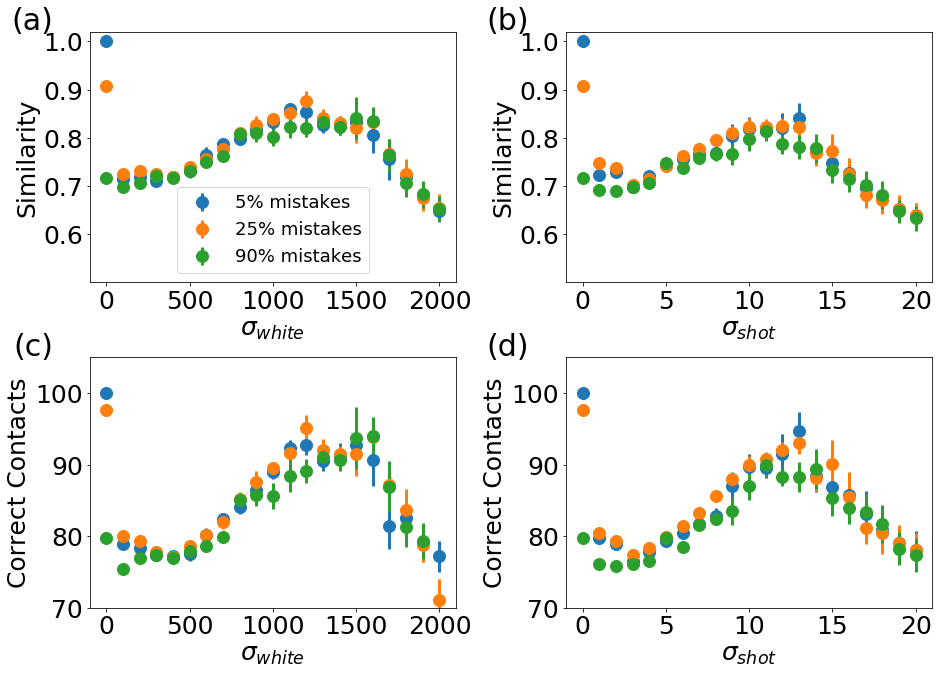

In [47]:
fig = plt.figure()
gs1 = gridspec.GridSpec(2, 2)
gs1.update(left=0.05, right=2, wspace=0.3,hspace=0.3,top=2,bottom=0)
fs=25
ms=12
matplotlib.rcParams.update({'font.size': fs})


ax1a = plt.subplot(gs1[0, 0]) 
ax2a = plt.subplot(gs1[1, 0]) 
ax1b = plt.subplot(gs1[0, 1]) 
ax2b = plt.subplot(gs1[1, 1]) 

ax1a.set_xlabel("$\sigma_{white}$")
ax2a.set_xlabel("$\sigma_{white}$")
ax1b.set_xlabel("$\sigma_{shot}$")
ax2b.set_xlabel("$\sigma_{shot}$")
ax1a.set_ylabel("Similarity")
ax1b.set_ylabel("Similarity")
ax2a.set_ylabel("Correct Contacts")
ax2b.set_ylabel("Correct Contacts")

Dir='mistakes'
ext='m13'
xa,ya,yea,xb,yb,yeb=get_dataF9_sim(ext)
ax1a.errorbar(xa*10.,ya,yerr=yea,linestyle='',marker='o',label='5% mistakes',markersize=ms,lw=3)
ax1b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='o',label='5% mistakes',markersize=ms,lw=3)

xa,ya,yea,xb,yb,yeb=get_dataF9_cont(ext)
ax2a.errorbar(xa*10.,ya,yerr=yea,linestyle='',marker='o',label='5% mistakes',markersize=ms,lw=3)
ax2b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='o',label='5% mistakes',markersize=ms,lw=3)


ext='m64'
xa,ya,yea,xb,yb,yeb=get_dataF9_sim(ext)
ax1a.errorbar(xa*10.,ya,yerr=yea,linestyle='',marker='o',label='25% mistakes',markersize=ms,lw=3)
ax1b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='o',label='25% mistakes',markersize=ms,lw=3)

xa,ya,yea,xb,yb,yeb=get_dataF9_cont(ext)
ax2a.errorbar(xa*10.,ya,yerr=yea,linestyle='',marker='o',label='25% mistakes',markersize=ms,lw=3)
ax2b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='o',label='25% mistakes',markersize=ms,lw=3)

ext='m230'
xa,ya,yea,xb,yb,yeb=get_dataF9_sim(ext)
ax1a.errorbar(xa*10.,ya,yerr=yea,linestyle='',marker='o',label='90% mistakes',markersize=ms,lw=3)
ax1b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='o',label='90% mistakes',markersize=ms,lw=3)

xa,ya,yea,xb,yb,yeb=get_dataF9_cont(ext)
ax2a.errorbar(xa*10.,ya,yerr=yea,linestyle='',marker='o',label='90% mistakes',markersize=ms,lw=3)
ax2b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='o',label='90% mistakes',markersize=ms,lw=3)


ax1a.legend(fontsize=18)#loc='upper right')
#ax2a.legend(fontsize=15)#loc='upper right')

ax1a.set_xlim(-100,2100)
ax1a.set_ylim(0.5,1.02)
ax1b.set_xlim(-1,21)
ax1b.set_ylim(0.5,1.02)
ax2a.set_xlim(-100,2100)
ax2a.set_ylim(70,105)
ax2b.set_xlim(-1,21)
ax2b.set_ylim(70,105)

ax1a.set_yticks([0.6,0.7,0.8,0.9,1.])
ax1b.set_yticks([0.6,0.7,0.8,0.9,1.])
#ax2a.set_yticks([325,375,425,475,512])
#ax2b.set_yticks([325,375,425,475,512])

ax1a.set_xticks([0.,500,1000,1500,2000])
ax2a.set_xticks([0.,500,1000,1500,2000])
ax1b.set_xticks([0.,5,10,15,20])
ax2b.set_xticks([0.,5,10,15,20])

ax1a.text(-0.1, 1.1, '(a)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax1b.text(-0.1, 1.1, '(b)',transform=ax1b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax2a.text(-0.1, 1.1, '(c)',transform=ax2a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax2b.text(-0.1, 1.1, '(d)',transform=ax2b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)

fig.savefig("Figure_S17.png",bbox_inches='tight',dpi=300)


### Fig S15- avg sim and contacts v noise for dev

In [48]:
def get_dataF10_sim(xx):
    df = pd.read_csv("data/fig10_1_"+xx+'.txt')
    return df['xwhite'].values,df['ywhite'].values,df['yerrW'].values,df['xshot'].values,df['yshot'].values,df['yerrS'].values

In [49]:
def get_dataF10_cont(xx):
    df = pd.read_csv("data/fig10_2_"+xx+'.txt')
    return df['xwhite'].values,df['ywhite'].values,df['yerrW'].values,df['xshot'].values,df['yshot'].values,df['yerrS'].values

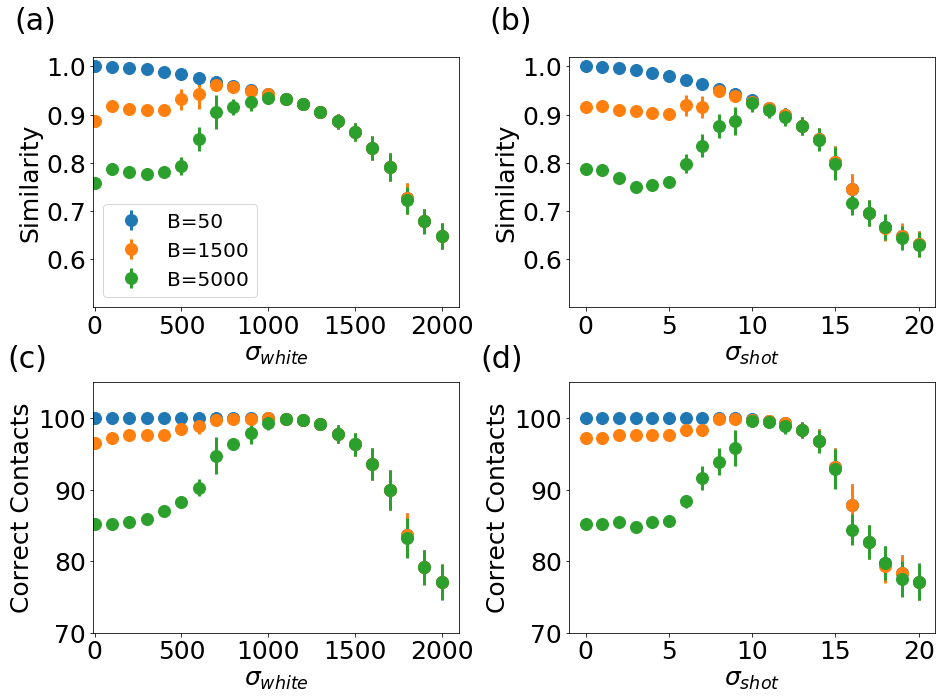

In [50]:
fig = plt.figure()
gs1 = gridspec.GridSpec(2, 2)
gs1.update(left=0.05, right=2, wspace=0.3,hspace=0.3,top=2,bottom=0)
fs=25
ms=12
matplotlib.rcParams.update({'font.size': fs})

ax1a = plt.subplot(gs1[0, 0]) 
ax2a = plt.subplot(gs1[1, 0]) 
ax1b = plt.subplot(gs1[0, 1]) 
ax2b = plt.subplot(gs1[1, 1]) 


ax1a.set_xlabel("$\sigma_{white}$")
ax2a.set_xlabel("$\sigma_{white}$")
ax1b.set_xlabel("$\sigma_{shot}$")
ax2b.set_xlabel("$\sigma_{shot}$")
ax1a.set_ylabel("Similarity")
ax1b.set_ylabel("Similarity")
ax2a.set_ylabel("Correct Contacts")
ax2b.set_ylabel("Correct Contacts")

Dir='dev'
ext='d50'
xa,ya,yea,xb,yb,yeb=get_dataF10_sim(ext)
ax1a.errorbar(xa*10.,ya,yerr=yea,linestyle='',marker='o',label='B=50',markersize=ms,lw=3)
ax1b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='o',label='B=50',markersize=ms,lw=3)

xa,ya,yea,xb,yb,yeb=get_dataF10_cont(ext)
ax2a.errorbar(xa*10.,ya,yerr=yea,linestyle='',marker='o',label='B=50',markersize=ms,lw=3)
ax2b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='o',label='B=50',markersize=ms,lw=3)


ext='d1500'
xa,ya,yea,xb,yb,yeb=get_dataF10_sim(ext)
ax1a.errorbar(xa*10.,ya,yerr=yea,linestyle='',marker='o',label='B=1500',markersize=ms,lw=3)
ax1b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='o',label='B=1500',markersize=ms,lw=3)

xa,ya,yea,xb,yb,yeb=get_dataF10_cont(ext)
ax2a.errorbar(xa*10.,ya,yerr=yea,linestyle='',marker='o',label='B=1500',markersize=ms,lw=3)
ax2b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='o',label='B=1500',markersize=ms,lw=3)


ext='d5000'
xa,ya,yea,xb,yb,yeb=get_dataF10_sim(ext)
ax1a.errorbar(xa*10.,ya,yerr=yea,linestyle='',marker='o',label='B=5000',markersize=ms,lw=3)
ax1b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='o',label='B=5000',markersize=ms,lw=3)

xa,ya,yea,xb,yb,yeb=get_dataF10_cont(ext)
ax2a.errorbar(xa*10.,ya,yerr=yea,linestyle='',marker='o',label='B=5000',markersize=ms,lw=3)
ax2b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='o',label='B=5000',markersize=ms,lw=3)


ax1a.legend(fontsize=20)#loc='upper right')
#ax2a.legend()#loc='upper right')

ax1a.set_xlim(-10,2100)
ax1a.set_ylim(0.5,1.02)
ax1b.set_xlim(-1,21)
ax1b.set_ylim(0.5,1.02)
ax2a.set_xlim(-10,2100)
ax2a.set_ylim(70,105)
ax2b.set_xlim(-1,21)
ax2b.set_ylim(70,105)

ax1a.set_yticks([0.6,0.7,0.8,0.9,1.])
ax1b.set_yticks([0.6,0.7,0.8,0.9,1.])
#ax2a.set_yticks([325,375,425,475,512])
#ax2b.set_yticks([325,375,425,475,512])

ax1a.set_xticks([0.,500,1000,1500,2000])
ax2a.set_xticks([0.,500,1000,1500,2000])
ax1b.set_xticks([0.,5,10,15,20])
ax2b.set_xticks([0.,5,10,15,20])

ax1a.text(-0.1, 1.2, '(a)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax1b.text(-0.1, 1.2, '(b)',transform=ax1b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax2a.text(-0.125, 1.15, '(c)',transform=ax2a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax2b.text(-0.125, 1.15, '(d)',transform=ax2b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)


fig.savefig("Figure_S18.png",bbox_inches='tight',dpi=300)


# Different noise levels

In [18]:
def getContacts_rand():
    df = pd.read_csv("../figures/data/fig3e.txt")
    return df['xwhite'].values*10.,df['ywhite'].values,df['yewhite'].values,df['xshot'].values,df['yshot'].values,df['yeshot'].values

In [19]:
def getSim_rand():
    df = pd.read_csv("../figures/data/fig3e2.txt")
    return df['xwhite'].values*10.,df['ywhite'].values,df['yewhite'].values,df['xshot'].values,df['yshot'].values,df['yeshot'].values

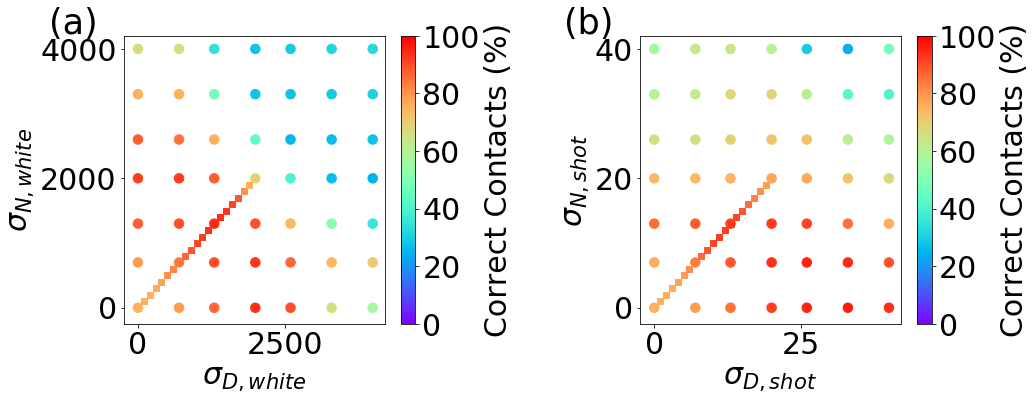

In [140]:
fig = plt.figure()
gs1 = gridspec.GridSpec(1, 3,width_ratios=[1.,0.5,1])#,height_ratios=[1,0.8,1])
gs1.update(left=0.05, right=2, wspace=0.05,hspace=0.03,top=1,bottom=0)
fs=30
matplotlib.rcParams.update({'font.size': fs})


#####33
dirn="../../figures_noiseDiff/data/"


mymap = 'rainbow'
ntype='white'
noiseNList=[0,130,200,260,400,70,330]
noiseDList=[0,130,400,200,260,70,330]

x,y,z,zerr=[],[],[],[]
for i in range(len(noiseNList)):
    for j in range(len(noiseDList)):
        tmpList=[]
        for sim in range(20):
            noiseN=noiseNList[i]
            noiseD=noiseDList[j]
            filen="Cont_16x16x1_"+str(ntype)+"_nN"+str(noiseN)+"_nD"+str(noiseD)+"_ss"+str(sim)+".txt"
            try:
                df = pd.read_csv(dirn+filen)
                tmpList+=list(df['contOpp'].values[10000:]/5.12)
            except:
                tmp=0
        x+=[noiseD*10.]
        y+=[noiseN*10.]
        z+=[np.mean(tmpList)]
        zerr+=[np.std(tmpList)]      

###############
###############
###############
xo,yo,zo,zoerr=[],[],[],[]
## random contacts for 16x16
df = pd.read_csv("../figures/data/fig3e.txt")
xo = df['xwhite'].values*10.
yo = df['xwhite'].values*10.
zo = df['ywhite'].values
zoerr = df['yewhite'].values

ax1a =plt.subplot(gs1[0, 0])
ax1a.text(-0.1, 1.1, '(a)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
cb=ax1a.scatter(x,y,c=z,cmap=mymap,vmin=0,vmax=100,marker='o',s=90)
cb=ax1a.scatter(xo,yo,c=zo,cmap=mymap,vmin=0,vmax=100,marker='s')
cbar = plt.colorbar(cb,ax=ax1a,label='Correct Contacts (%)')
ax1a.set_xlabel("$\sigma_{D,white}$",fontsize=fs)
ax1a.set_ylabel("$\sigma_{N,white}$",fontsize=fs)



######################

ntype='shot'
noiseNList=[0,13,20,26,40,7,33]
noiseDList=[0,13,40,20,26,7,33]

x,y,z,zerr=[],[],[],[]
for i in range(len(noiseNList)):
    for j in range(len(noiseDList)):
        tmpList=[]
        for sim in range(20):
            noiseN=noiseNList[i]
            noiseD=noiseDList[j]
            filen="Cont_16x16x1_"+str(ntype)+"_nN"+str(noiseN)+"_nD"+str(noiseD)+"_ss"+str(sim)+".txt"
            try:
                df = pd.read_csv(dirn+filen)
                tmpList+=list(df['contOpp'].values[10000:]/5.12)
            except:
                tmp=0
        x+=[noiseD]
        y+=[noiseN]
        z+=[np.mean(tmpList)]
        zerr+=[np.std(tmpList)]        
                
Xl,Yl,Zl=[],[],[]
xun = np.unique(x)
for el in np.sort(xun):
    inds = np.argwhere(el==np.array(x))[:,0]
    ytmp=np.array(y)[inds]
    ztmp=np.array(z)[inds]
    tmpXl,tmpYl,tmpZl=[],[],[]
    for j in range(len(ytmp)):
        tmpXl+=[el]
        tmpYl+=[ytmp[j]]
        tmpZl+=[ztmp[j]]
        
    Xl+=[tmpXl]
    Yl+=[tmpYl]
    Zl+=[tmpZl]
###############
###############
###############
xo,yo,zo,zoerr=[],[],[],[]
df = pd.read_csv("../figures/data/fig3e.txt")
xo = df['xshot'].values
yo = df['xshot'].values
zo = df['yshot'].values
zoerr = df['yeshot'].values

            
ax1b =plt.subplot(gs1[0, 2])
ax1b.text(-0.1, 1.1, '(b)',transform=ax1b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
cb=ax1b.scatter(x,y,c=z,cmap=mymap,vmin=0,vmax=100,marker='o',s=90)
cb=ax1b.scatter(xo,yo,c=zo,cmap=mymap,vmin=0,vmax=100,marker='s')
cbar = plt.colorbar(cb,ax=ax1b,label='Correct Contacts (%)')
ax1b.set_xlabel("$\sigma_{D,shot}$",fontsize=fs)
ax1b.set_ylabel("$\sigma_{N,shot}$",fontsize=fs)

fig.savefig("Figure_S19.png",bbox_inches='tight',dpi=300)
plt.show()
plt.close()

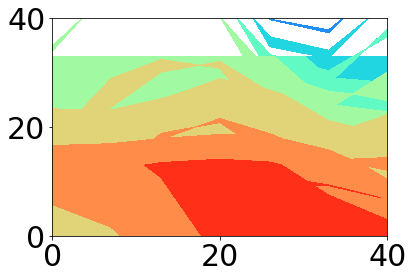

In [39]:
plt.contourf(Xl,Yl,Zl,cmap='rainbow')

### Fig S16 - avg sim and contacts for different lattice size

In [29]:
def get_dataF11_sim(xx):
    df = pd.read_csv("data/fig11_1_"+xx+'.txt')
    return df['xwhite'].values,df['ywhite'].values,df['yerrW'].values,df['xshot'].values,df['yshot'].values,df['yerrS'].values

In [30]:
def get_dataF11_cont(xx):
    df = pd.read_csv("data/fig11_2_"+xx+'.txt')
    return df['xwhite'].values,df['ywhite'].values,df['yerrW'].values,df['xshot'].values,df['yshot'].values,df['yerrS'].values

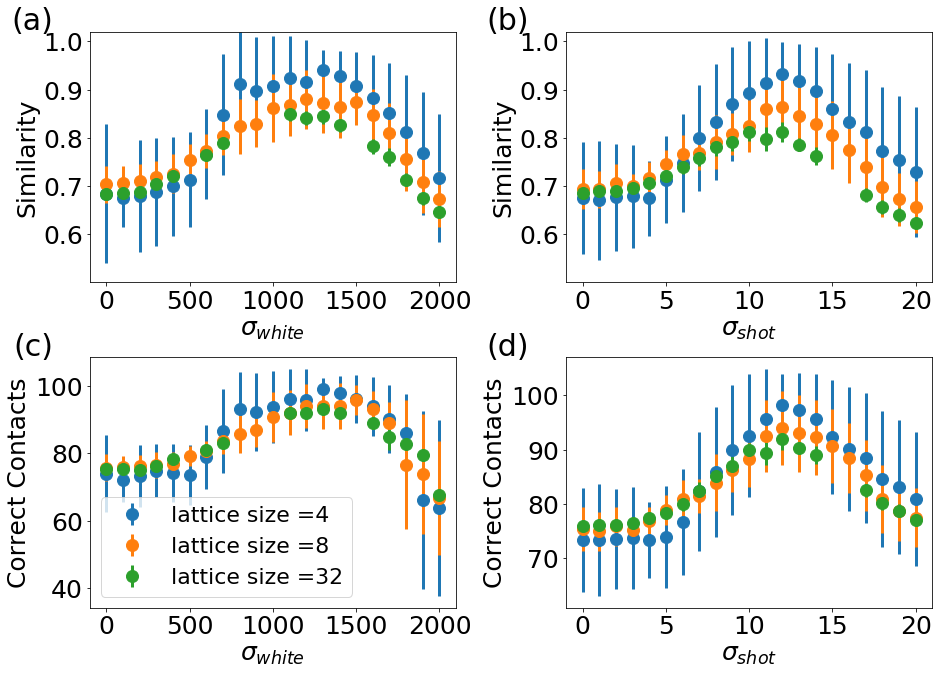

In [146]:
fig = plt.figure()
gs1 = gridspec.GridSpec(2, 2)
gs1.update(left=0.05, right=2, wspace=0.3,hspace=0.3,top=2,bottom=0)
fs=25
ms=12
matplotlib.rcParams.update({'font.size': fs})


ax1a = plt.subplot(gs1[0, 0]) 
ax2a = plt.subplot(gs1[1, 0]) 
ax1b = plt.subplot(gs1[0, 1]) 
ax2b = plt.subplot(gs1[1, 1]) 

ax1a.set_xticks([])
ax1b.set_xticks([])
ax2a.set_xticks([])
ax2b.set_xticks([])
ax1a.set_xlabel("$\sigma_{white}$")
ax2a.set_xlabel("$\sigma_{white}$")
ax1b.set_xlabel("$\sigma_{shot}$")
ax2b.set_xlabel("$\sigma_{shot}$")
ax1a.set_ylabel("Similarity")
ax1b.set_ylabel("Similarity")
ax2a.set_ylabel("Correct Contacts")
ax2b.set_ylabel("Correct Contacts")

ext='4x'
xa,ya,yea,xb,yb,yeb=get_dataF11_sim(ext)
ax1a.errorbar(xa*10.,ya,yerr=yea,linestyle='',marker='o',label='lattice size =4',markersize=ms,lw=3)
ax1b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='o',label='lattice size =4',markersize=ms,lw=3)

xa,ya,yea,xb,yb,yeb=get_dataF11_cont(ext)
ax2a.errorbar(xa*10.,ya,yerr=yea,linestyle='',marker='o',label='lattice size =4',markersize=ms,lw=3)
ax2b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='o',label='lattice size =4',markersize=ms,lw=3)


ext='8x'
xa,ya,yea,xb,yb,yeb=get_dataF11_sim(ext)
ax1a.errorbar(xa*10.,ya,yerr=yea,linestyle='',marker='o',label='lattice size =8',markersize=ms,lw=3)
ax1b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='o',label='lattice size =8',markersize=ms,lw=3)

xa,ya,yea,xb,yb,yeb=get_dataF11_cont(ext)
ax2a.errorbar(xa*10.,ya,yerr=yea,linestyle='',marker='o',label='lattice size =8',markersize=ms,lw=3)
ax2b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='o',label='lattice size =8',markersize=ms,lw=3)


ext='32x'
xa,ya,yea,xb,yb,yeb=get_dataF11_sim(ext)
ax1a.errorbar(xa*10.,ya,yerr=yea,linestyle='',marker='o',label='lattice size =32',markersize=ms,lw=3)
ax1b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='o',label='lattice size =32',markersize=ms,lw=3)

xa,ya,yea,xb,yb,yeb=get_dataF11_cont(ext)
ax2a.errorbar(xa*10.,ya,yerr=yea,linestyle='',marker='o',label='lattice size =32',markersize=ms,lw=3)
ax2b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='o',label='lattice size =32',markersize=ms,lw=3)


#ax1a.legend()#loc='upper right')
ax2a.legend(fontsize=22)#loc='upper right')

ax1a.set_xlim(-100,2100)
ax1a.set_ylim(0.5,1.02)
ax1b.set_xlim(-1,21)
ax1b.set_ylim(0.5,1.02)
ax2a.set_xlim(-100,2100)
#ax2a.set_ylim(60,105)
ax2b.set_xlim(-1,21)
#ax2b.set_ylim(60,105)

ax1a.set_yticks([0.6,0.7,0.8,0.9,1.])
ax1b.set_yticks([0.6,0.7,0.8,0.9,1.])
#ax2a.set_yticks([325,375,425,475,512])
#ax2b.set_yticks([325,375,425,475,512])

ax1a.set_xticks([0.,500,1000,1500,2000])
ax2a.set_xticks([0.,500,1000,1500,2000])
ax1b.set_xticks([0.,5,10,15,20])
ax2b.set_xticks([0.,5,10,15,20])

ax1a.text(-0.1, 1.1, '(a)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax1b.text(-0.1, 1.1, '(b)',transform=ax1b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax2a.text(-0.1, 1.1, '(c)',transform=ax2a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax2b.text(-0.1, 1.1, '(d)',transform=ax2b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)


fig.savefig("Figure_S20.png",bbox_inches='tight',dpi=300)


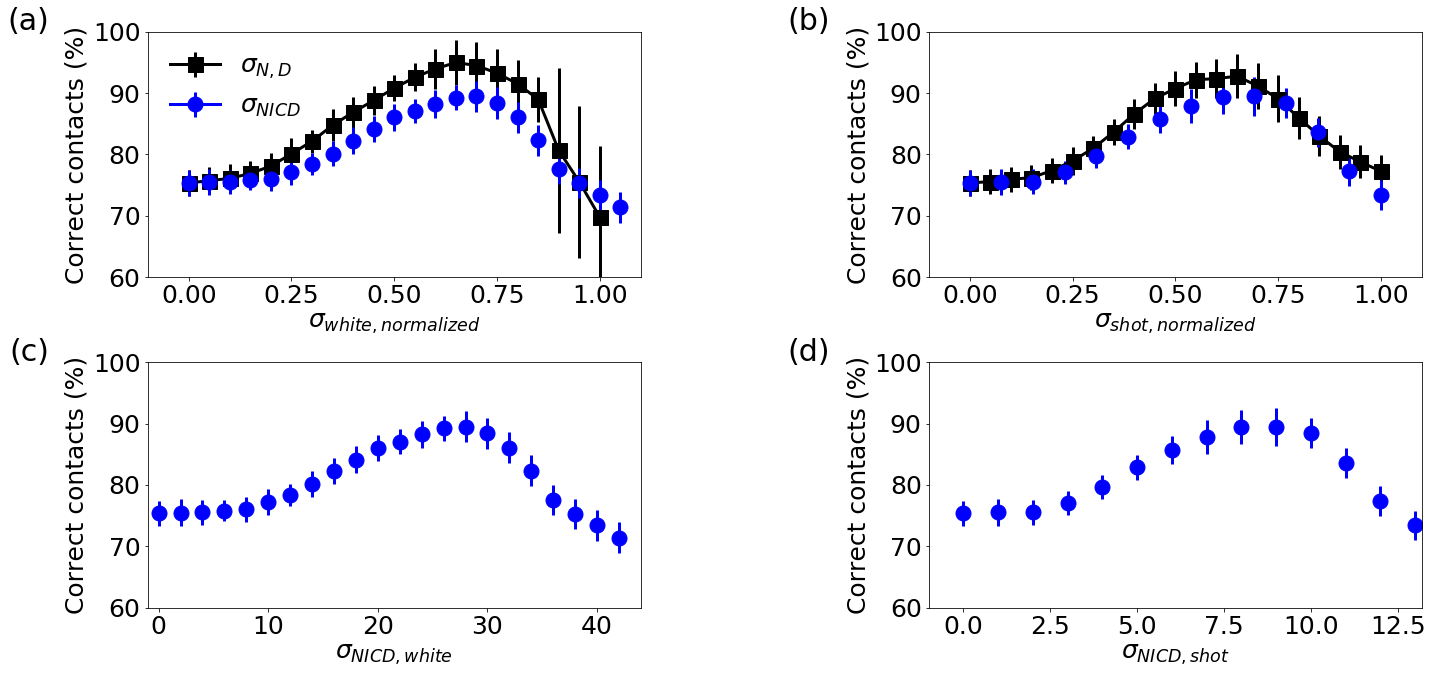

In [37]:
fig = plt.figure()
gs1 = gridspec.GridSpec(3, 3,width_ratios=[1.,0.5,1],height_ratios=[1,0.3,1])
gs1.update(left=0.05, right=3, wspace=0.05,hspace=0.03,top=2,bottom=0)
fs=25
matplotlib.rcParams.update({'font.size': fs})

dirn = "/home/madeline/Research/signaling/paper1/figures_NICD/data/"
dir16="/home/madeline/Research/signaling/paper1/figures_Oct2020/data/"
ax1a = plt.subplot(gs1[0, 0])
ax1a.text(-0.2, 1.1, '(a)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax1b = plt.subplot(gs1[0, 2])
ax1b.text(-0.2, 1.1, '(b)',transform=ax1b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)

df = pd.read_csv("../figures/data/fig3e.txt")
nAmp = df['xwhite'].values
y = df['ywhite'].values
yerr = df['yewhite'].values
ax1a.errorbar(nAmp/200.,y,yerr=yerr,marker='s',color='k',markersize=15,lw=3,label='$\sigma_{N,D}$')
        
df = pd.read_csv("../figures/data/fig3e.txt")
nAmp = df['xshot'].values
y = df['yshot'].values
yerr = df['yeshot'].values
ax1b.errorbar(nAmp/20.,y,yerr=yerr,marker='s',color='k',markersize=15,lw=3)
 

for nAmp in range(0,43,2):#[0,10,130,13,15,1,200,20,25,30,35,40,45,50,55,60,65,70,75,7,46,47,48,49]:
    tstart=10000
    tmp=[]
    for sim in range(20):
            df = pd.read_csv(dirn+"Cont_16x16x1_white_nI"+str(nAmp)+"_ss"+str(sim)+".txt")
            tmp+=list(df['contOpp'].values[tstart:]/5.12)
    if nAmp==0:
        ax1a.errorbar(nAmp/40.,np.mean(tmp),yerr=np.std(tmp),marker='o',color='b',markersize=15,lw=3,label='$\sigma_{NICD}$')
    else:
        ax1a.errorbar(nAmp/40.,np.mean(tmp),yerr=np.std(tmp),marker='o',color='b',markersize=15,lw=3)

for nAmp in np.arange(0,14):#21):
    tstart=10000
    tmp=[]
    for sim in range(20):
        df = pd.read_csv(dirn+"Cont_16x16x1_shot_nI"+str(nAmp)+"_ss"+str(sim)+".txt")
        tmp+=list(df['contOpp'].values[tstart:]/5.12)
    ax1b.errorbar(nAmp/13.,np.mean(tmp),yerr=np.std(tmp),marker='o',color='b',markersize=15,lw=3)

    

ax1a.set_xlabel("$\sigma_{white,normalized}$")
ax1a.set_ylabel("Correct contacts (%)")
ax1a.set_xlim(-0.1,1.1)
ax1a.set_ylim(60,100)
ax1a.legend(frameon=False,loc='upper left')
#ax1a.hlines([75,90,96],-10,210,color=['g','b','k'],lw=5)

ax1b.set_xlabel("$\sigma_{shot,normalized}$")
ax1b.set_ylabel("Correct contacts (%)")
ax1b.set_xlim(-0.1,1.1)
ax1b.set_ylim(60,100)
#ax1b.hlines([75,90,96],-10,210,color=['g','b','k'],lw=5)

##########
ax1a = plt.subplot(gs1[2, 0])
ax1a.text(-0.2, 1.1, '(c)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax1b = plt.subplot(gs1[2, 2])
ax1b.text(-0.2, 1.1, '(d)',transform=ax1b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)

for nAmp in range(0,43,2):#[0,10,130,13,15,1,200,20,25,30,35,40,45,50,55,60,65,70,75,7,46,47,48,49]:
    tstart=10000
    tmp=[]
    for sim in range(20):
        df = pd.read_csv(dirn+"Cont_16x16x1_white_nI"+str(nAmp)+"_ss"+str(sim)+".txt")
        tmp+=list(df['contOpp'].values[tstart:]/5.12)
    ax1a.errorbar(nAmp,np.mean(tmp),yerr=np.std(tmp),marker='o',color='b',markersize=15,lw=3)

    
    
for nAmp in np.arange(0,14):#21):
    tstart=10000
    tmp=[]
    for sim in range(20):
        df = pd.read_csv(dirn+"Cont_16x16x1_shot_nI"+str(nAmp)+"_ss"+str(sim)+".txt")
        tmp+=list(df['contOpp'].values[tstart:]/5.12)
    ax1b.errorbar(nAmp,np.mean(tmp),yerr=np.std(tmp),marker='o',color='b',markersize=15,lw=3)

    
    

ax1a.set_xlabel("$\sigma_{NICD,white}$")
ax1a.set_ylabel("Correct contacts (%)")
ax1a.set_xlim(-1,44)
ax1a.set_ylim(60,100)
ax1a.legend(frameon=False,loc='upper left',fontsize=fs-5)
#ax1a.hlines([75,90,96],-10,210,color=['g','b','k'],lw=5)

ax1b.set_xlabel("$\sigma_{NICD,shot}$")
ax1b.set_ylabel("Correct contacts (%)")
ax1b.set_xlim(-1,13.2)
ax1b.set_ylim(60,100)
#ax1b.hlines([75,90,96],-10,210,color=['g','b','k'],lw=5)


fig.savefig("Figure_S21.png",bbox_inches='tight',dpi=300)
plt.show()
plt.close()

### Fig S17- Fig 4 but with S2R

In [ ]:
def get_data12(xx):
    df = pd.read_csv("data/fig12"+xx+".txt")   
    return df['x'].values,df['y'].values,df['color'].values

In [ ]:
fig = plt.figure()
gs1 = gridspec.GridSpec(2, 5, width_ratios=[1,0.05,0.7,1,0.05])
gs1.update(left=0.05, right=3, wspace=0.05,hspace=0.5,top=3,bottom=0)
fs=35
matplotlib.rcParams.update({'font.size': fs})


ax2e = plt.subplot(gs1[0, 0])
ax2f = plt.subplot(gs1[0, 3])
ax2g = plt.subplot(gs1[1, 0])
ax2h = plt.subplot(gs1[1, 3])

cbax2e=plt.subplot(gs1[0,1])
cbax2f=plt.subplot(gs1[0,4])
cbax2g=plt.subplot(gs1[1,1])
cbax2h=plt.subplot(gs1[1,4])

######
a,b,c=get_data12("a")
a2e=ax2e.scatter(a,b,c=np.log10(c),s=2,cmap='nipy_spectral_r')
a,b,c=get_data12("b")
a2f=ax2f.scatter(a,b,c=np.log10(c),s=2,cmap='nipy_spectral_r')
######
a,b,c=get_data12("c")
a2g=ax2g.scatter(a,b,c=np.log10(c),s=2,cmap='nipy_spectral_r')
a,b,c=get_data12("d")
a2h=ax2h.scatter(a,b,c=np.log10(c),s=2,cmap='nipy_spectral_r')

cb = matplotlib.colorbar.Colorbar(ax = cbax2e, mappable = a2e)
cb.set_label(r' log10(Time))')
cb = matplotlib.colorbar.Colorbar(ax = cbax2f, mappable = a2f)
cb.set_label(r' log10(Time))')
cb = matplotlib.colorbar.Colorbar(ax = cbax2g, mappable = a2g)
cb.set_label(r' log10(Time))')
cb = matplotlib.colorbar.Colorbar(ax = cbax2h, mappable = a2h)
cb.set_label(r' log10(Time))')
ax2e.set_title("S to R for $\sigma_{white}=1300$",fontsize=fs)
ax2f.set_title("S to R for $\sigma_{shot}=13$",fontsize=fs)
ax2g.set_title("S to R for $\sigma_{white}=2000$",fontsize=fs)
ax2h.set_title("S to R for $\sigma_{shot}=20$",fontsize=fs)

ax2g.set_ylabel("$<N_{ext}>$")
ax2e.set_ylabel("$<N_{ext}>$")
ax2f.set_ylabel("$<N_{ext}>$")
ax2h.set_ylabel("$<N_{ext}>$")
ax2e.set_xlabel("$<D_{ext}>$")
ax2f.set_xlabel("$<D_{ext}>$")
ax2g.set_xlabel("$<D_{ext}>$")
ax2h.set_xlabel("$<D_{ext}>$")


ax2e.text(-0.1, 1.1, '(A)',transform=ax2e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax2f.text(-0.1, 1.1, '(b)',transform=ax2f.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax2g.text(-0.1, 1.1, '(c)',transform=ax2g.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax2h.text(-0.1, 1.1, '(d)',transform=ax2h.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)

fig.savefig("Figure_S22.png",bbox_inches='tight',dpi=300)
plt.show()
plt.close()


### Fig S18- Fig 4 but with S2R vs sender/Receiver

In [ ]:
def get_data13(xx):
    df = pd.read_csv("data/fig13"+xx+".txt")   
    return df['x'].values,df['y'].values,df['color'].values

In [ ]:
fig = plt.figure()
gs1 = gridspec.GridSpec(2, 5, width_ratios=[1,0.05,0.7,1,0.05])
gs1.update(left=0.05, right=3, wspace=0.05,hspace=0.5,top=3,bottom=0)
fs=35
matplotlib.rcParams.update({'font.size': fs})



ax2e = plt.subplot(gs1[0, 0])
ax2f = plt.subplot(gs1[0, 3])
ax2g = plt.subplot(gs1[1, 0])
ax2h = plt.subplot(gs1[1, 3])

cbax2e=plt.subplot(gs1[0,1])
cbax2f=plt.subplot(gs1[0,4])
cbax2g=plt.subplot(gs1[1,1])
cbax2h=plt.subplot(gs1[1,4])

######
a,b,c=get_data13('a')
a2e=ax2e.scatter(a,b,c=np.log10(c),s=2,cmap='nipy_spectral_r')
a,b,c=get_data13('b')
a2f=ax2f.scatter(a,b,c=np.log10(c),s=2,cmap='nipy_spectral_r')
######
a,b,c=get_data13('c')
a2g=ax2g.scatter(a,b,c=np.log10(c),s=2,cmap='nipy_spectral_r')
a,b,c=get_data13('d')
a2h=ax2h.scatter(a,b,c=np.log10(c),s=2,cmap='nipy_spectral_r')

cb = matplotlib.colorbar.Colorbar(ax = cbax2e, mappable = a2e)
cb.set_label(r' log10(Time))', labelpad=10)
cb = matplotlib.colorbar.Colorbar(ax = cbax2f, mappable = a2f)
cb.set_label(r' log10(Time))', labelpad=10)
cb = matplotlib.colorbar.Colorbar(ax = cbax2g, mappable = a2g)
cb.set_label(r' log10(Time))', labelpad=10)
cb = matplotlib.colorbar.Colorbar(ax = cbax2h, mappable = a2h)
cb.set_label(r' log10(Time))', labelpad=10)

ax2e.set_title("S to R for $\sigma_{white}=1300$",fontsize=fs)
ax2f.set_title("S to R for $\sigma_{shot}=13$",fontsize=fs)
ax2g.set_title("S to R for $\sigma_{white}=2000$",fontsize=fs)
ax2h.set_title("S to R for $\sigma_{shot}=20$",fontsize=fs)

ax2g.set_ylabel("$<R_{nn}>$")
ax2e.set_ylabel("$<R_{nn}>$")
ax2f.set_ylabel("$<R_{nn}>$")
ax2h.set_ylabel("$<R_{nn}>$")
ax2e.set_xlabel("$<S_{nn}>$")
ax2f.set_xlabel("$<S_{nn}>$")
ax2g.set_xlabel("$<S_{nn}>$")
ax2h.set_xlabel("$<S_{nn}>$")


ax2e.text(-0.1, 1.1, '(a)',transform=ax2e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax2f.text(-0.1, 1.1, '(b)',transform=ax2f.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax2g.text(-0.1, 1.1, '(c)',transform=ax2g.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax2h.text(-0.1, 1.1, '(d)',transform=ax2h.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)

fig.savefig("Figure_S23.png",bbox_inches='tight',dpi=300)
plt.show()
plt.close()


### Fig S19- Fig 4 but with R2S vs sender/Receiver

In [ ]:
def get_data14(xx):
    df = pd.read_csv("data/fig14"+xx+".txt")   
    return df['x'].values,df['y'].values,df['color'].values

In [ ]:
fig = plt.figure()
gs1 = gridspec.GridSpec(2, 5, width_ratios=[1,0.05,0.7,1,0.05])
gs1.update(left=0.05, right=3, wspace=0.05,hspace=0.5,top=3,bottom=0)
fs=35
matplotlib.rcParams.update({'font.size': fs})



ax2e = plt.subplot(gs1[0, 0])
ax2f = plt.subplot(gs1[0, 3])
ax2g = plt.subplot(gs1[1, 0])
ax2h = plt.subplot(gs1[1, 3])

cbax2e=plt.subplot(gs1[0,1])
cbax2f=plt.subplot(gs1[0,4])
cbax2g=plt.subplot(gs1[1,1])
cbax2h=plt.subplot(gs1[1,4])

######
a,b,c=get_data14('a')
a2e=ax2e.scatter(a,b,c=np.log10(c),s=2,cmap='nipy_spectral_r')
a,b,c=get_data14('b')
a2f=ax2f.scatter(a,b,c=np.log10(c),s=2,cmap='nipy_spectral_r')
######
a,b,c=get_data14('c')
a2g=ax2g.scatter(a,b,c=np.log10(c),s=2,cmap='nipy_spectral_r')
a,b,c=get_data14('d')
a2h=ax2h.scatter(a,b,c=np.log10(c),s=2,cmap='nipy_spectral_r')

cb = matplotlib.colorbar.Colorbar(ax = cbax2e, mappable = a2e)
cb.set_label(r' log10(Time))', labelpad=10)
cb = matplotlib.colorbar.Colorbar(ax = cbax2f, mappable = a2f)
cb.set_label(r' log10(Time))', labelpad=10)
cb = matplotlib.colorbar.Colorbar(ax = cbax2g, mappable = a2g)
cb.set_label(r' log10(Time))', labelpad=10)
cb = matplotlib.colorbar.Colorbar(ax = cbax2h, mappable = a2h)
cb.set_label(r' log10(Time))', labelpad=10)

ax2e.set_title("R to S for $\sigma_{white}=1300$",fontsize=fs)
ax2f.set_title("R to S for $\sigma_{shot}=13$",fontsize=fs)
ax2g.set_title("R to S for $\sigma_{white}=2000$",fontsize=fs)
ax2h.set_title("R to S for $\sigma_{shot}=20$",fontsize=fs)

ax2g.set_ylabel("$<R_{nn}>$")
ax2e.set_ylabel("$<R_{nn}>$")
ax2f.set_ylabel("$<R_{nn}>$")
ax2h.set_ylabel("$<R_{nn}>$")
ax2e.set_xlabel("$<S_{nn}>$")
ax2f.set_xlabel("$<S_{nn}>$")
ax2g.set_xlabel("$<S_{nn}>$")
ax2h.set_xlabel("$<S_{nn}>$")


ax2e.text(-0.1, 1.1, '(a)',transform=ax2e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax2f.text(-0.1, 1.1, '(b)',transform=ax2f.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax2g.text(-0.1, 1.1, '(c)',transform=ax2g.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax2h.text(-0.1, 1.1, '(d)',transform=ax2h.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)

fig.savefig("Figure_S24.png",bbox_inches='tight',dpi=300)
plt.show()
plt.close()


# convergence of dt using euler scheme

In [143]:
def plottimedt(xx):
    df = pd.read_csv("data/figdt_"+xx+'C.txt')
    return df['xwhite'].values,df['ywhite'].values,df['yerrW'].values,df['xshot'].values,df['yshot'].values,df['yerrS'].values

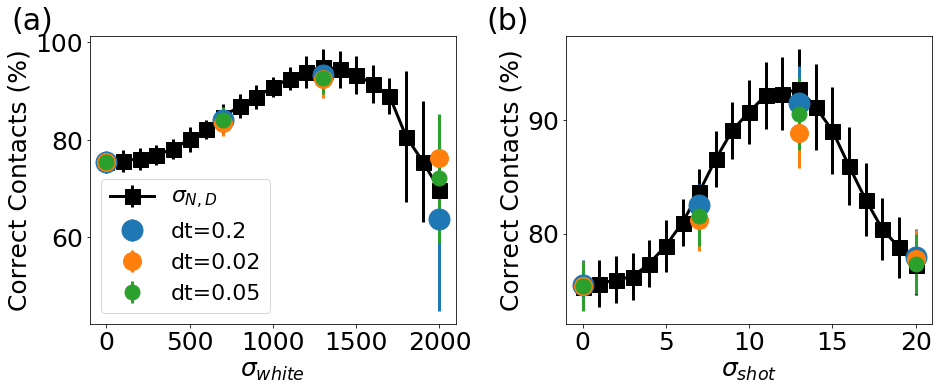

In [162]:
fig = plt.figure()
gs1 = gridspec.GridSpec(1, 2)
gs1.update(left=0.05, right=2, wspace=0.3,hspace=0.3,top=1,bottom=0)
fs=25
ms=12
matplotlib.rcParams.update({'font.size': fs})


ax2a = plt.subplot(gs1[0, 0]) 
ax2b = plt.subplot(gs1[0, 1]) 

df = pd.read_csv("../figures/data/fig3e.txt")
nAmp = df['xwhite'].values
y = df['ywhite'].values
yerr = df['yewhite'].values
ax2a.errorbar(nAmp*10.,y,yerr=yerr,marker='s',color='k',markersize=15,lw=3,label='$\sigma_{N,D}$')
        
df = pd.read_csv("../figures/data/fig3e.txt")
nAmp = df['xshot'].values
y = df['yshot'].values
yerr = df['yeshot'].values
ax2b.errorbar(nAmp,y,yerr=yerr,marker='s',color='k',markersize=15,lw=3)
 
ax2a.set_xticks([])
ax2b.set_xticks([])
ax2a.set_xlabel("$\sigma_{white}$")
ax2b.set_xlabel("$\sigma_{shot}$")
ax2a.set_ylabel("Correct Contacts (%)")
ax2b.set_ylabel("Correct Contacts (%)")

ext='0_2'
ms=21
xa,ya,yea,xb,yb,yeb=plottimedt(ext)
ax2a.errorbar(xa*10.,ya,yerr=yea,linestyle='',marker='o',label='dt=0.2',markersize=ms,lw=3)
ax2b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='o',label='dt=0.2',markersize=ms,lw=3)


ext='0_02'
ms=18
xa,ya,yea,xb,yb,yeb=plottimedt(ext)
ax2a.errorbar(xa*10.,ya,yerr=yea,linestyle='',marker='o',label='dt=0.02',markersize=ms,lw=3)
ax2b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='o',label='dt=0.02',markersize=ms,lw=3)


ext='0_05'
ms=15
xa,ya,yea,xb,yb,yeb=plottimedt(ext)
ax2a.errorbar(xa*10.,ya,yerr=yea,linestyle='',marker='o',label='dt=0.05',markersize=ms,lw=3)
ax2b.errorbar(xb,yb,yerr=yeb,linestyle='',marker='o',label='dt=0.05',markersize=ms,lw=3)


#ax1a.legend()#loc='upper right')
ax2a.legend(fontsize=22)#loc='upper right')

ax2a.set_xlim(-100,2100)
#ax2a.set_ylim(60,105)
ax2b.set_xlim(-1,21)
#ax2b.set_ylim(60,105)

#ax2a.set_yticks([325,375,425,475,512])
#ax2b.set_yticks([325,375,425,475,512])

ax2a.set_xticks([0.,500,1000,1500,2000])
ax2b.set_xticks([0.,5,10,15,20])

ax2a.text(-0.1, 1.1, '(a)',transform=ax2a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax2b.text(-0.1, 1.1, '(b)',transform=ax2b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)


fig.savefig("Figure_S25.png",bbox_inches='tight',dpi=300)


# Figure S21 - randomness

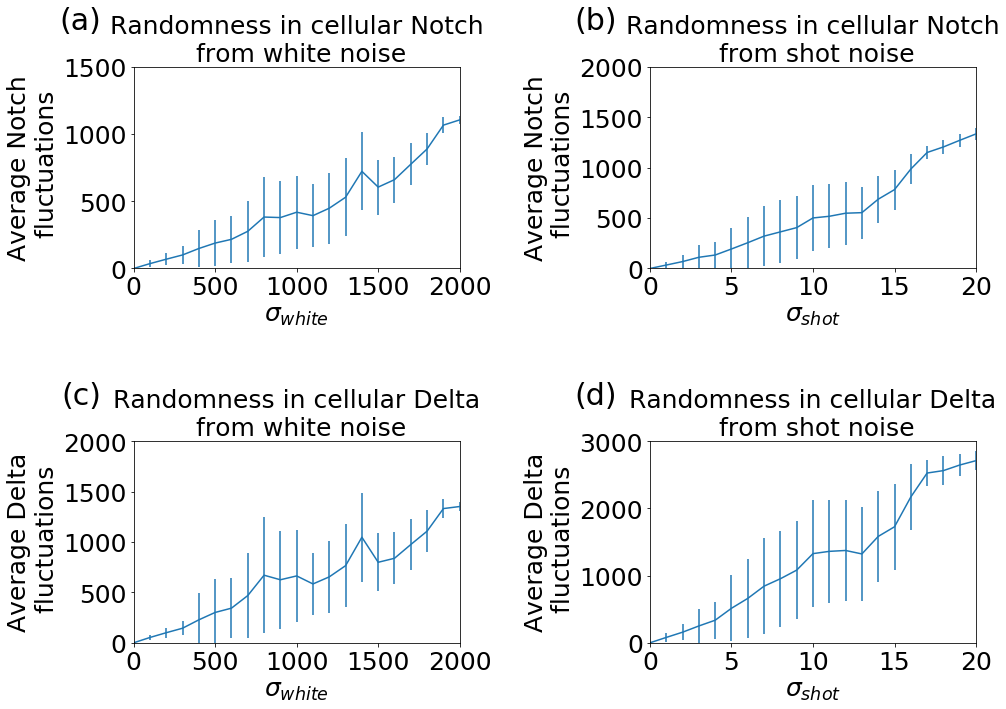

In [111]:
fig = plt.figure()
gs1 = gridspec.GridSpec(3, 3,width_ratios=[1.,0.5,1],height_ratios=[1,0.8,1])
gs1.update(left=0.05, right=2, wspace=0.05,hspace=0.03,top=2,bottom=0)
fs=25
matplotlib.rcParams.update({'font.size': fs})


noiseW,resWN,resWD=[],[],[]
stdWN,stdWD=[],[]
for noise in np.arange(0,210,10):
    with open('oct_white'+str(noise)+'.json') as jsonfile:
        d0w =json.load(jsonfile)

    noiseW+=[noise*10]
    resWN+=[np.mean(d0w['Nstd'])]
    stdWN+=[np.std(d0w['Nstd'])]
    resWD+=[np.mean(d0w['Dstd'])]
    stdWD+=[np.std(d0w['Dstd'])]

noiseS,resSN,resSD=[],[],[]
stdSN,stdSD=[],[]
for noise in np.arange(0,21):
    with open('oct_shot'+str(noise)+'.json') as jsonfile:
        d0w =json.load(jsonfile)

    noiseS+=[noise]
    resSN+=[np.mean(d0w['Nstd'])]
    stdSN+=[np.std(d0w['Nstd'])]
    resSD+=[np.mean(d0w['Dstd'])]
    stdSD+=[np.std(d0w['Dstd'])]

#########3
ax1a = plt.subplot(gs1[0, 0])
ax1a.text(-0.1, 1.3, '(a)',transform=ax1a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax1a.errorbar(noiseW,resWN,yerr=stdWN)
ax1a.set_xlabel("$\sigma_{white}$")
ax1a.set_ylabel("Average Notch\n fluctuations")
ax1a.set_xlim(0,2000)
ax1a.set_ylim(0,1500)
ax1a.set_title("Randomness in cellular Notch\n from white noise",fontsize=fs)

ax1c = plt.subplot(gs1[2, 0])
ax1c.text(-0.1, 1.3, '(c)',transform=ax1c.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax1c.errorbar(noiseW,resWD,yerr=stdWD)
ax1c.set_xlabel("$\sigma_{white}$")
ax1c.set_ylabel("Average Delta\n fluctuations")
ax1c.set_xlim(0,2000)
ax1c.set_ylim(0,2000)
ax1c.set_title("Randomness in cellular Delta\n from white noise",fontsize=fs)

ax1b = plt.subplot(gs1[0, 2])
ax1b.text(-0.1, 1.3, '(b)',transform=ax1b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax1b.errorbar(noiseS,resSN,yerr=stdSN)
ax1b.set_xlabel("$\sigma_{shot}$")
ax1b.set_ylabel("Average Notch\n fluctuations")
ax1b.set_xlim(0,20)
ax1b.set_ylim(0,2000)
ax1b.set_title("Randomness in cellular Notch\n from shot noise",fontsize=fs)

ax1d = plt.subplot(gs1[2, 2])
ax1d.text(-0.1, 1.3, '(d)',transform=ax1d.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax1d.errorbar(noiseS,resSD,yerr=stdSD)
ax1d.set_xlabel("$\sigma_{shot}$")
ax1d.set_ylabel("Average Delta\n fluctuations")
ax1d.set_xlim(0,20)
ax1d.set_ylim(0,3000)
ax1d.set_title("Randomness in cellular Delta\n from shot noise",fontsize=fs)

fig.savefig("Figure_S26.png",bbox_inches='tight',dpi=300)
plt.show()
plt.close()